In [1]:
import numpy as np
import pandas as pd

In [2]:
train_dataset = r"./match_history.csv"
df = pd.read_csv(train_dataset)
df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,2004-09-03,Spain,Scotland,Europe,Europe,3,67,0,0,1,...,No,Draw,94.0,84.0,86.5,89.3,89.5,80.2,79.7,81.8
1,2004-09-04,Albania,Greece,Europe,Europe,94,14,0,0,2,...,No,Win,NaN,90.0,NaN,59.0,74.5,82.8,83.7,85.2
2,2004-09-04,Austria,England,Europe,Europe,90,7,0,0,2,...,No,Draw,83.0,88.0,76.2,73.0,74.0,90.5,88.7,91.2
3,2004-09-04,Croatia,Hungary,Europe,Europe,25,76,0,0,3,...,No,Win,77.0,74.0,80.5,78.7,79.0,71.8,75.7,70.2
4,2004-09-04,Denmark,Ukraine,Europe,Europe,15,87,0,0,1,...,No,Draw,82.0,NaN,79.5,85.0,81.5,NaN,81.7,65.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5636,2021-12-07,Algeria,Egypt,Africa,Africa,32,45,1508,1449,1,...,No,Draw,78.0,NaN,78.0,81.0,78.0,NaN,79.3,70.8
5637,2021-12-08,Mexico,Chile,North America,South America,14,24,1638,1541,2,...,No,Draw,80.0,79.0,76.8,82.7,78.2,75.5,76.7,78.2
5638,2021-12-11,Morocco,Algeria,Africa,Africa,28,32,1525,1508,2,...,Yes,Lose,82.0,78.0,81.2,81.7,76.2,78.0,81.0,78.0
5639,2021-12-18,Tunisia,Algeria,Africa,Africa,29,32,1512,1508,0,...,No,Lose,NaN,78.0,70.8,72.3,74.0,78.0,81.0,78.0


In [3]:
train_dataset = r"./match_history.csv"
df = pd.read_csv(train_dataset)


core_df = df[[
    "date", 
    "home_team", "away_team", 
    "home_team_fifa_rank", "away_team_fifa_rank",  
    'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
    'home_team_mean_defense_score', 'home_team_mean_offense_score',
    'home_team_mean_midfield_score', 'away_team_mean_defense_score',
    'away_team_mean_offense_score', 'away_team_mean_midfield_score',
    'home_team_result',
    ]].copy()

#simple data modification
core_df = core_df.fillna(0)
core_df["home_team_result"] = core_df["home_team_result"].replace(['Lose', 'Draw', 'Win'], [-1, 0, 1])
core_df['date'] = core_df['date'].str.replace(r"\D", "")


#variables 
home_score = [
    'home_team_goalkeeper_score', 
    'home_team_mean_defense_score', 
    'home_team_mean_offense_score',
    'home_team_mean_midfield_score',
]

away_score = [
    'away_team_goalkeeper_score',
    'away_team_mean_defense_score',
    'away_team_mean_offense_score', 
    'away_team_mean_midfield_score',
]

#country = np.unique(country_name, return_counts=True)
country_list = df['home_team'].values
country_list = np.unique(country_list)

pos_score = [
    'gk_score',
    'def_score',
    'mid_score',
    'atk_score'
    ]

/Users/minyong/opt/anaconda3/envs/BENG/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: The default value of regex will change from True to False in a future version.


In [4]:
scores = {}


for index, row in core_df.iterrows():
    home = row['home_team']
    away = row['away_team']
    
    if home not in scores:
        scores[home] = {}
        scores[home]['gk_score'] = []
        scores[home]['def_score'] = []
        scores[home]['mid_score'] = []
        scores[home]['atk_score'] = []
        
    if away not in scores:
        scores[away] = {}
        scores[away]['gk_score'] = []
        scores[away]['def_score'] = []
        scores[away]['mid_score'] = []
        scores[away]['atk_score'] = []
    
    scores[home]['gk_score'].append([row['date'], row['home_team_goalkeeper_score']])
    scores[home]['def_score'].append([row['date'], row['home_team_mean_defense_score']])
    scores[home]['mid_score'].append([row['date'], row['home_team_mean_midfield_score']])
    scores[home]['atk_score'].append([row['date'],row['home_team_mean_offense_score']])
    
    scores[away]['gk_score'].append([row['date'], row['away_team_goalkeeper_score']])
    scores[away]['def_score'].append([row['date'], row['away_team_mean_defense_score']])
    scores[away]['mid_score'].append([row['date'], row['away_team_mean_midfield_score']])
    scores[away]['atk_score'].append([row['date'],row['away_team_mean_offense_score']])
    
    
    
scores['Albania']

{'gk_score': [['20040904', 0.0],
  ['20041009', 0.0],
  ['20050326', 0.0],
  ['20050330', 0.0],
  ['20050529', 0.0],
  ['20050608', 0.0],
  ['20051012', 0.0],
  ['20060906', 0.0],
  ['20061011', 0.0],
  ['20070324', 0.0],
  ['20070328', 0.0],
  ['20070912', 52.0],
  ['20071013', 52.0],
  ['20071017', 52.0],
  ['20071121', 52.0],
  ['20080527', 52.0],
  ['20080906', 51.0],
  ['20081011', 51.0],
  ['20081015', 51.0],
  ['20090328', 51.0],
  ['20090401', 51.0],
  ['20090606', 51.0],
  ['20090610', 51.0],
  ['20090909', 65.0],
  ['20091014', 65.0],
  ['20091114', 65.0],
  ['20100303', 65.0],
  ['20100525', 65.0],
  ['20100903', 69.0],
  ['20101008', 69.0],
  ['20101012', 69.0],
  ['20101117', 69.0],
  ['20110209', 69.0],
  ['20110326', 69.0],
  ['20110607', 69.0],
  ['20110620', 69.0],
  ['20110810', 69.0],
  ['20110902', 70.0],
  ['20111007', 70.0],
  ['20111011', 70.0],
  ['20111115', 70.0],
  ['20120229', 70.0],
  ['20120815', 70.0],
  ['20120911', 74.0],
  ['20121012', 74.0],
  ['20121

In [5]:
# fetch according country, position_team_mean_score from dict scores 
# Since Nan replaced with 0s, if 0 not included in the data, returns an empty list 
# => no missing values, no prediction needed
def fetch_country_pos_score(country, pos_score):
    predict_target = []
    model_data = []
    
    for item in scores[country][pos_score]:
        if 0 in item:
            predict_target.append(item)
        else:
            model_data.append(item)
            
    if predict_target == []:
        #print("No missing values")
        return []
            
    else:   
        data = [model_data, predict_target,country, pos_score]

        # model_data and predict_target to np float array
        data[0] = np.array(data[0]).astype(float)
        data[1] = np.array(data[1]).astype(float)

        return data

fetch_country_pos_score('Albania','gk_score')

[array([[2.0070912e+07, 5.2000000e+01],
        [2.0071013e+07, 5.2000000e+01],
        [2.0071017e+07, 5.2000000e+01],
        [2.0071121e+07, 5.2000000e+01],
        [2.0080527e+07, 5.2000000e+01],
        [2.0080906e+07, 5.1000000e+01],
        [2.0081011e+07, 5.1000000e+01],
        [2.0081015e+07, 5.1000000e+01],
        [2.0090328e+07, 5.1000000e+01],
        [2.0090401e+07, 5.1000000e+01],
        [2.0090606e+07, 5.1000000e+01],
        [2.0090610e+07, 5.1000000e+01],
        [2.0090909e+07, 6.5000000e+01],
        [2.0091014e+07, 6.5000000e+01],
        [2.0091114e+07, 6.5000000e+01],
        [2.0100303e+07, 6.5000000e+01],
        [2.0100525e+07, 6.5000000e+01],
        [2.0100903e+07, 6.9000000e+01],
        [2.0101008e+07, 6.9000000e+01],
        [2.0101012e+07, 6.9000000e+01],
        [2.0101117e+07, 6.9000000e+01],
        [2.0110209e+07, 6.9000000e+01],
        [2.0110326e+07, 6.9000000e+01],
        [2.0110607e+07, 6.9000000e+01],
        [2.0110620e+07, 6.9000000e+01],


In [6]:
def fetch_country_score(country):
    data = []
    
    #index 0: gk, index 1: def, index 2: mid, index 3: atk
    for score in pos_score:
        data.append(fetch_country_pos_score(country,score))
    
    return data

fetch_country_score('Zambia')

[[array([], dtype=float64),
  array([[20050903.,        0.],
         [20060122.,        0.],
         [20060130.,        0.]]),
  'Zambia',
  'gk_score'],
 [array([], dtype=float64),
  array([[20050903.,        0.],
         [20060122.,        0.],
         [20060130.,        0.]]),
  'Zambia',
  'def_score'],
 [],
 []]

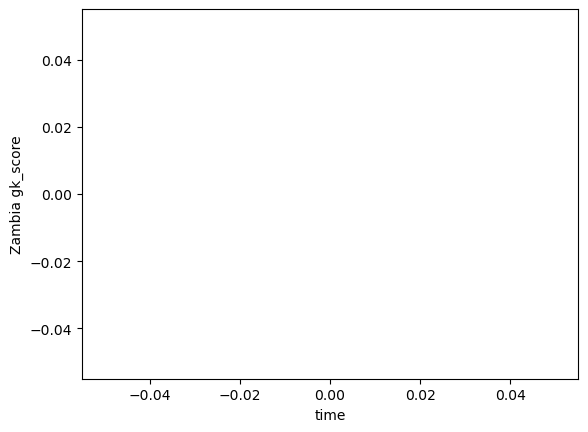

In [7]:
import matplotlib.pyplot as plt
global targets
targets = []
# plot data based on country and pos_score info
def show_model_data(country, pos_score):
    global targets
    data = fetch_country_pos_score(country, pos_score)
    
    if data == []:
        return
    else:
        model_data = data[0]
        if model_data.size == 0:
            targets.append("{} {}".format(country,pos_score))
        d = np.hsplit(model_data,2)
        plt.scatter(d[0],d[1])
        plt.xlabel('time')
        plt.ylabel("{} {}".format(country,pos_score))
        plt.show()

show_model_data('Zambia','gk_score')

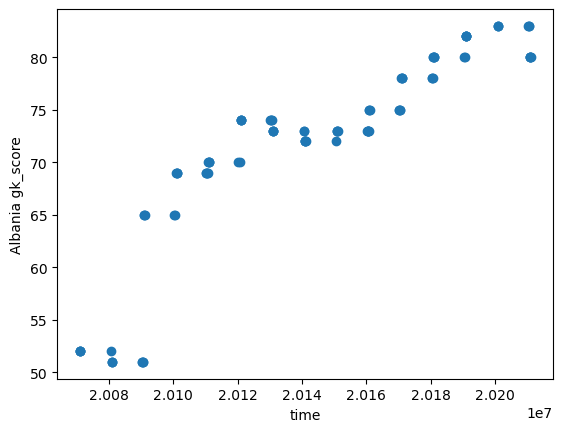

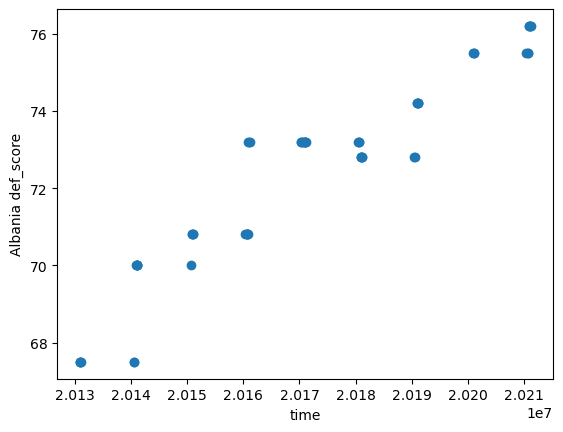

In [8]:
import matplotlib.pyplot as plt

global target_graph_total
target_graph_total = 0


# displays the variables that needs to be investigated to generate missing values
# so for Albania case, gk and def scores contain missing values => target for prediction
def show_model_data_country(country):
    count = 0
    data = fetch_country_score(country)
    global target_graph_total
    
    for elem in data:
        count += 1
        if elem == []:
            pass
        else:
            country = elem[-2]
            pos_score = elem[-1]
            show_model_data(country,pos_score)
            target_graph_total = target_graph_total+1
            
            

show_model_data_country('Albania')

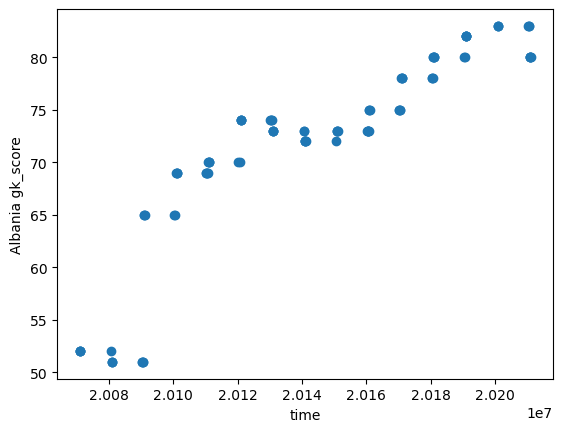

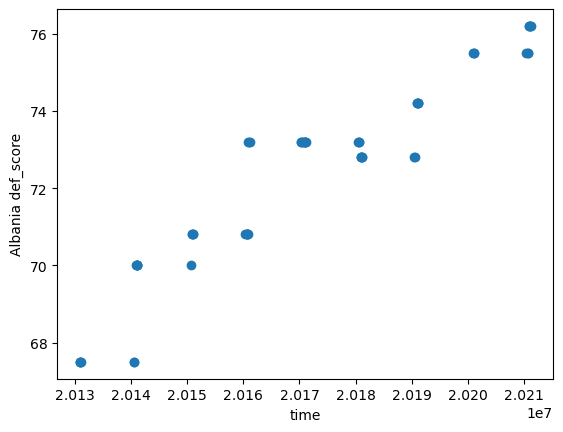

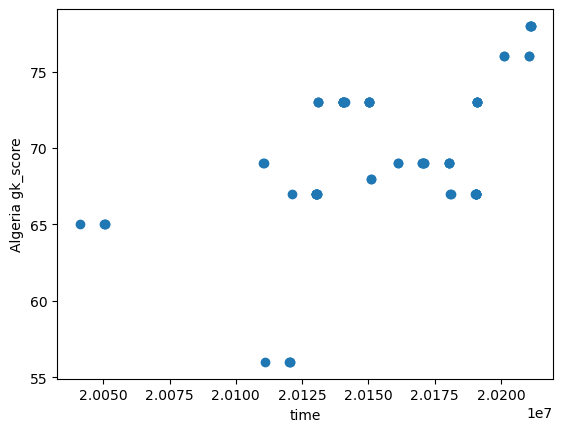

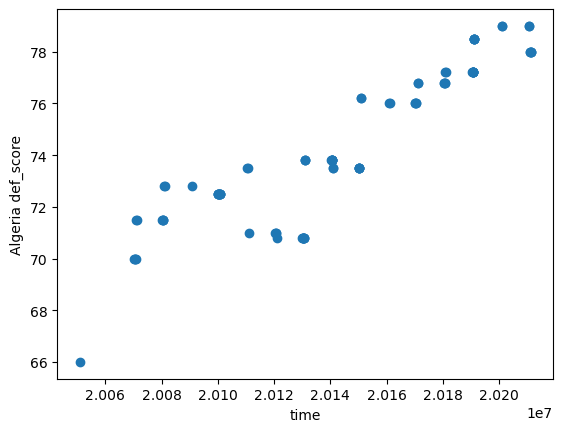

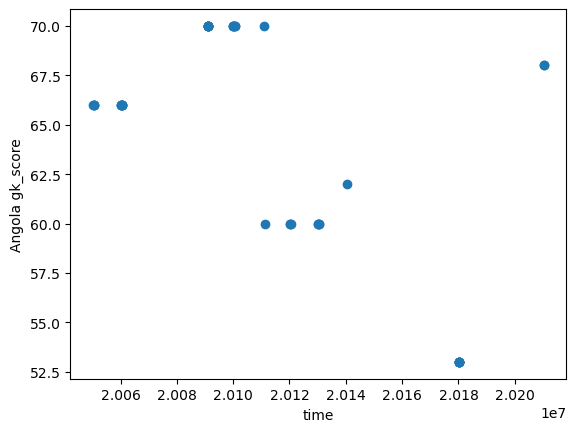

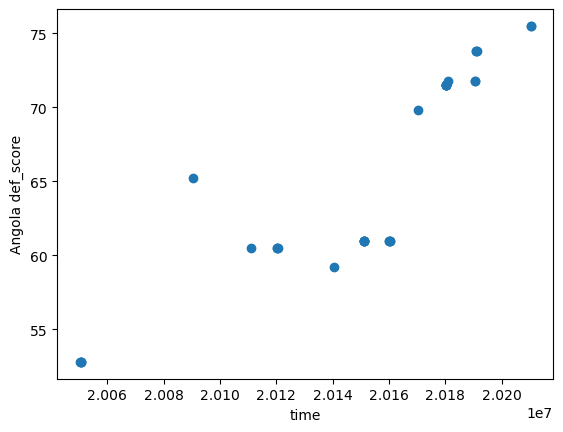

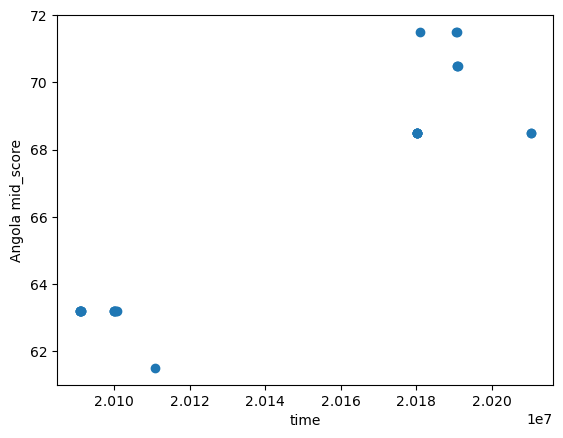

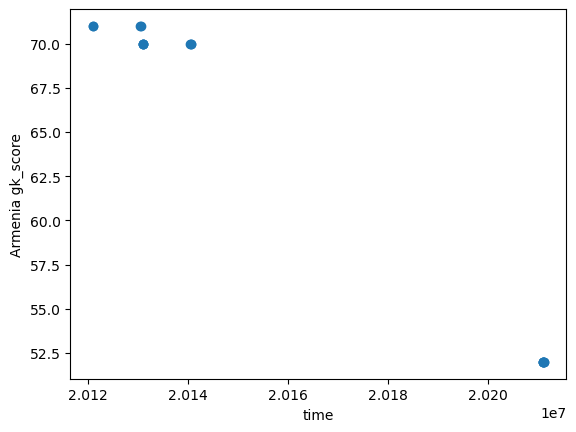

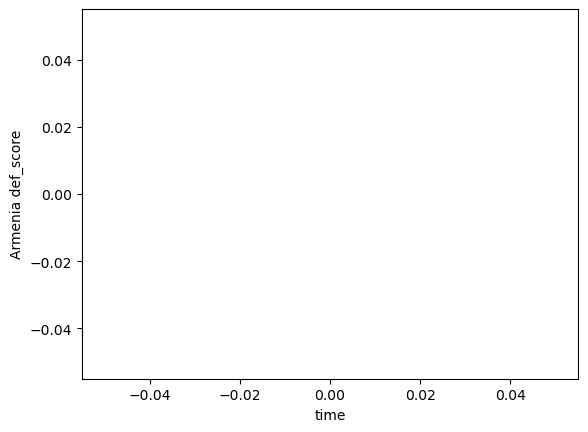

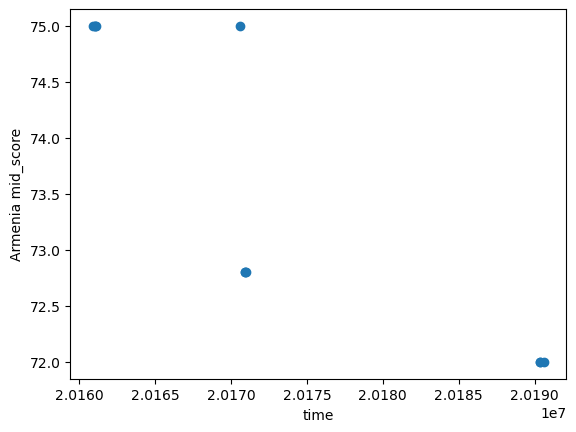

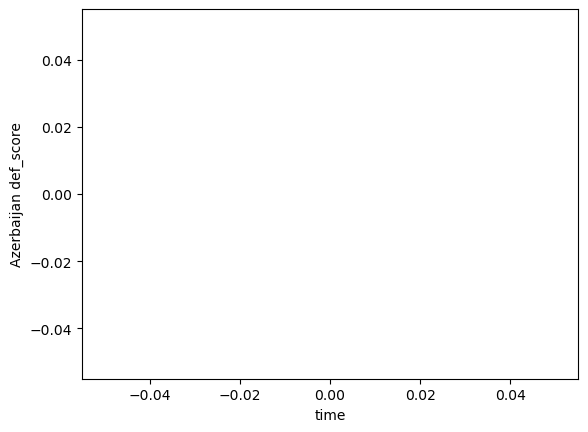

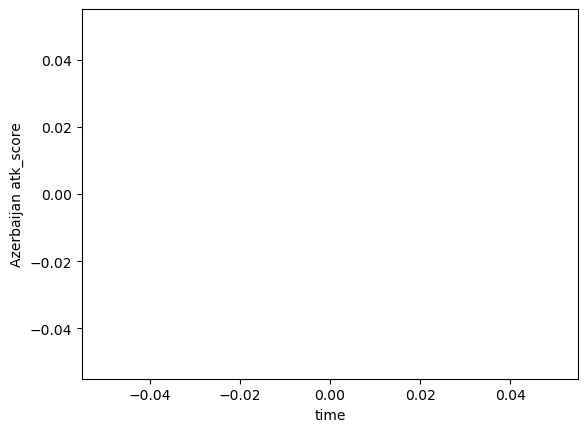

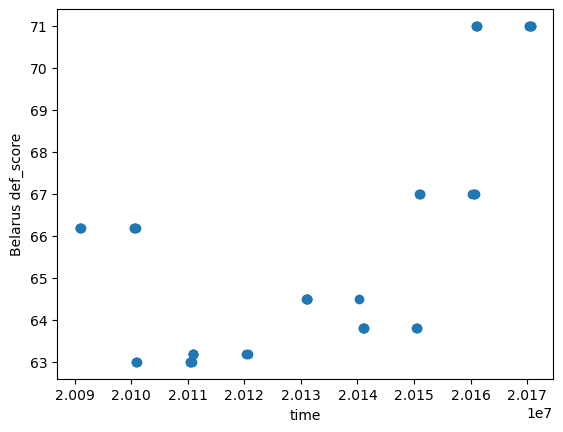

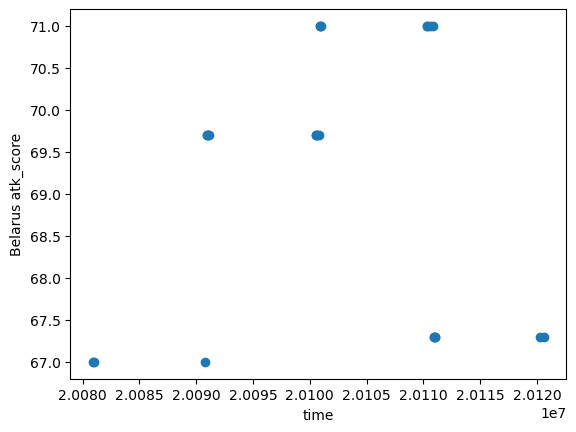

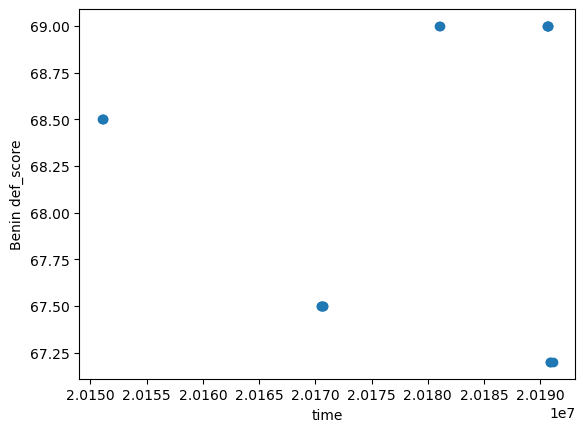

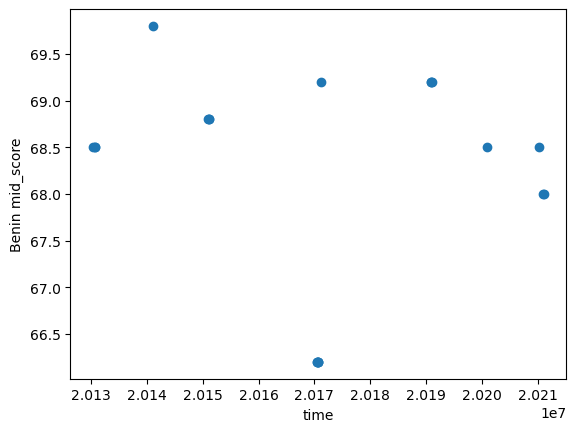

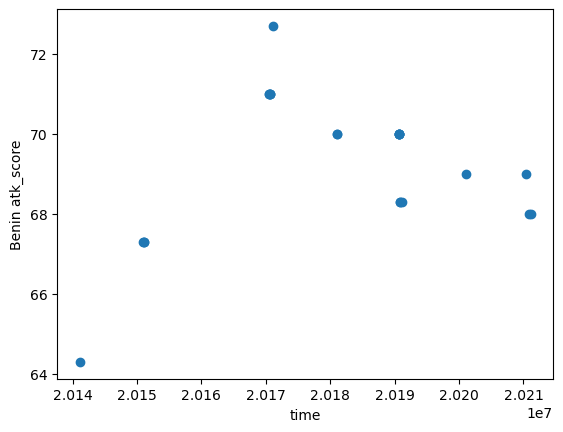

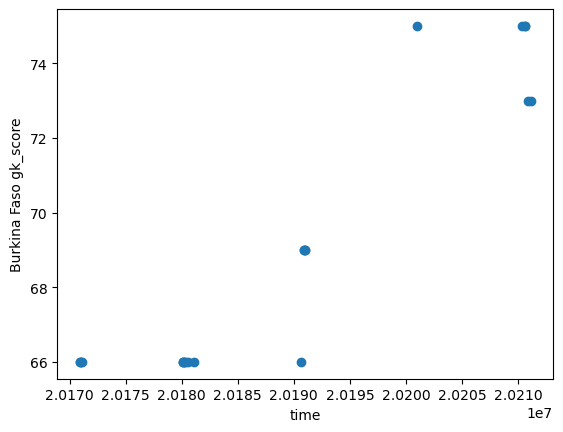

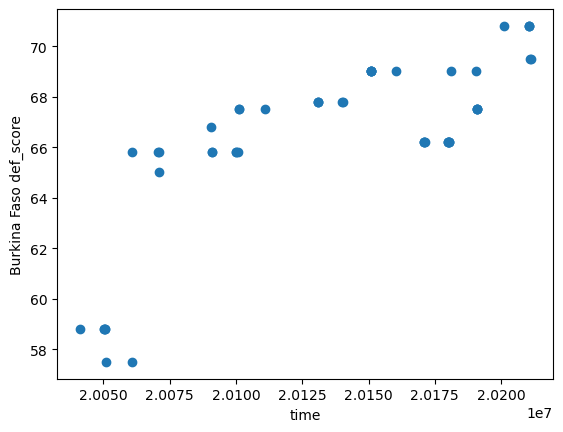

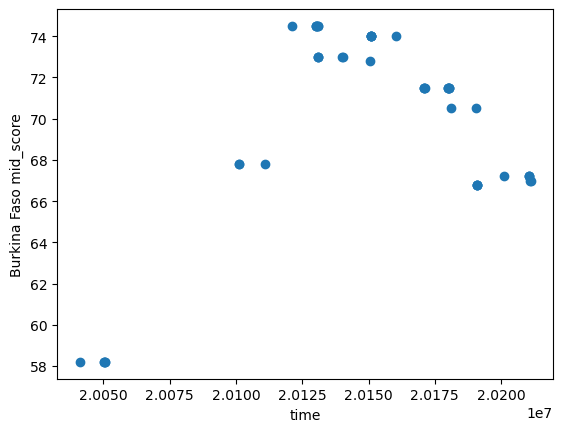

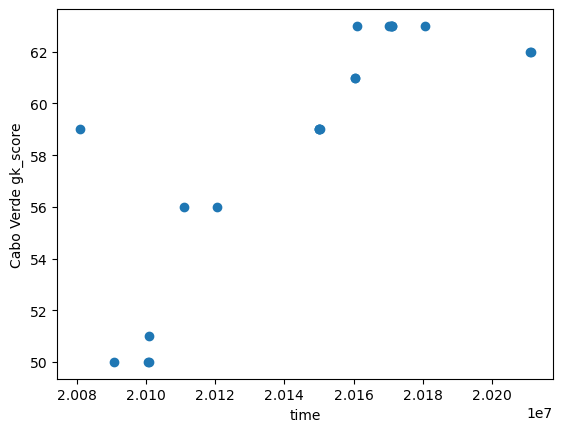

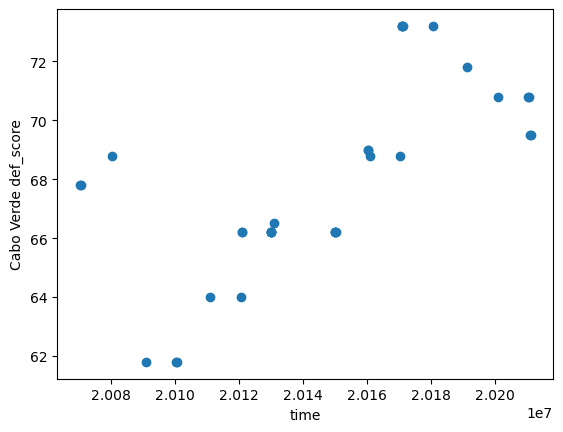

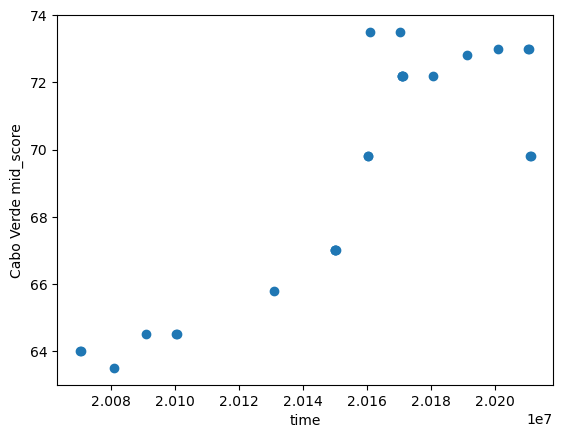

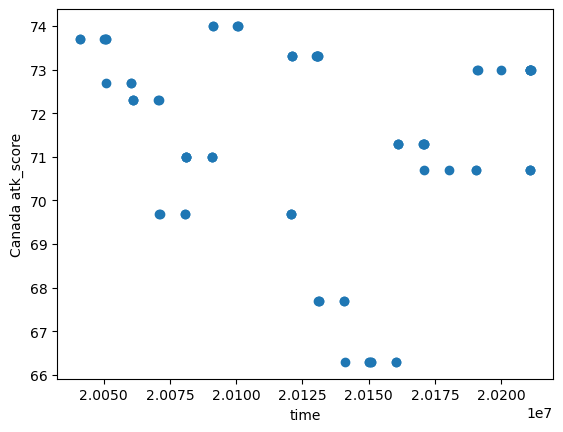

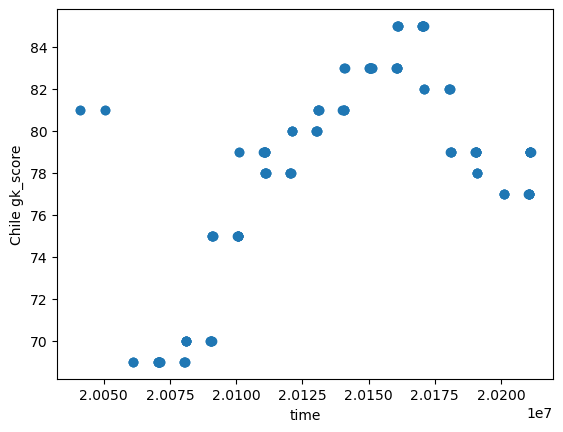

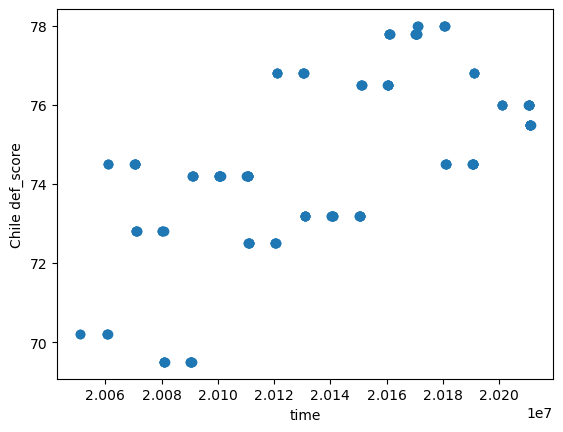

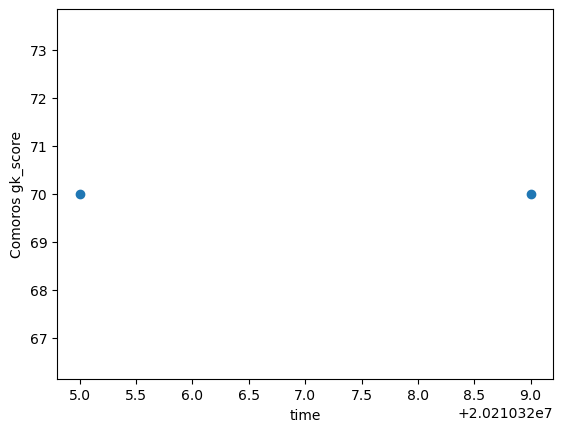

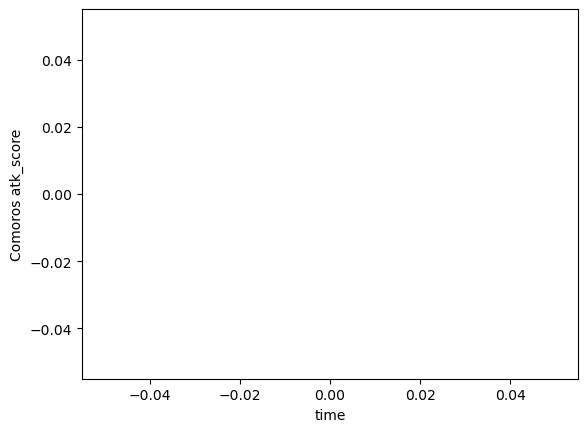

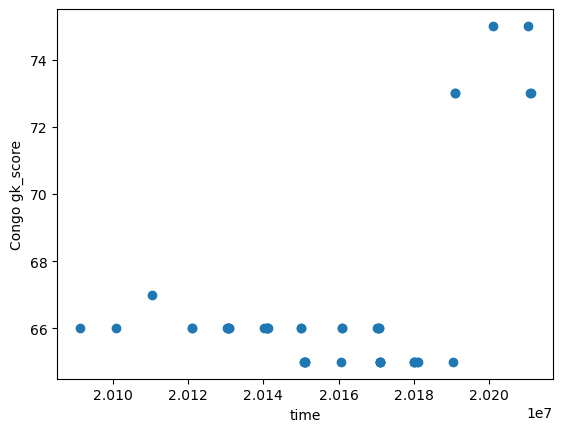

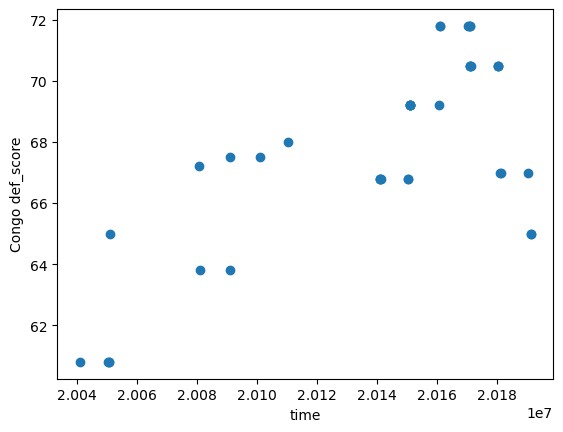

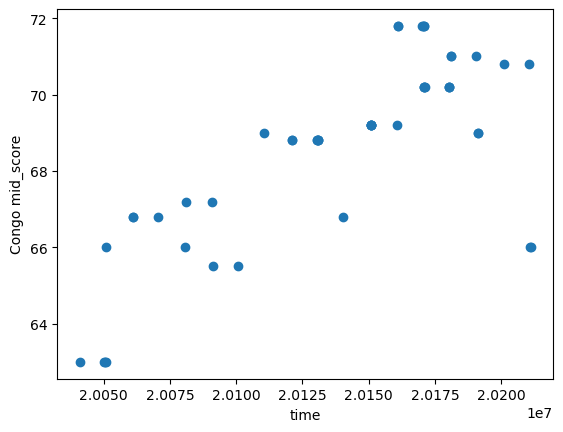

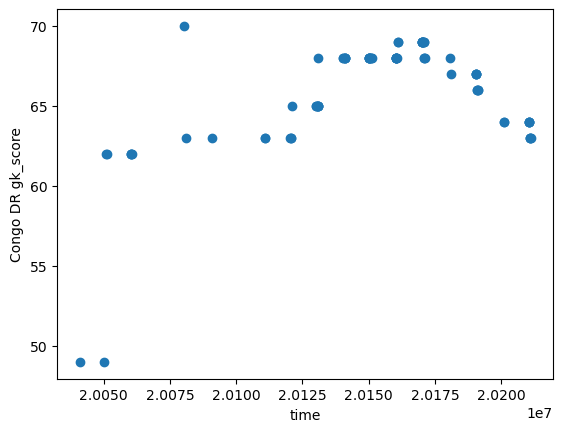

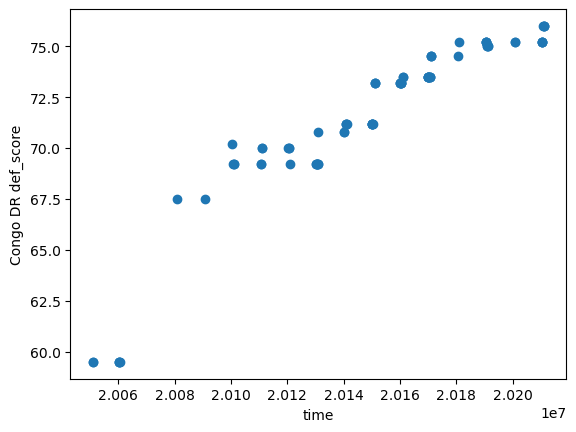

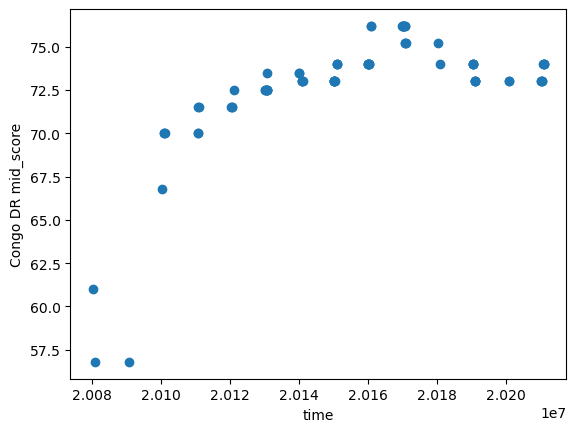

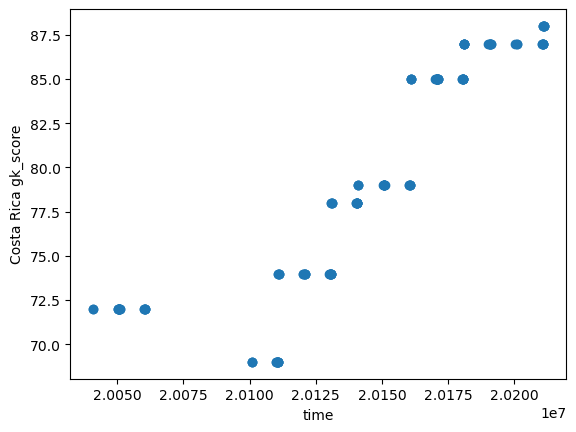

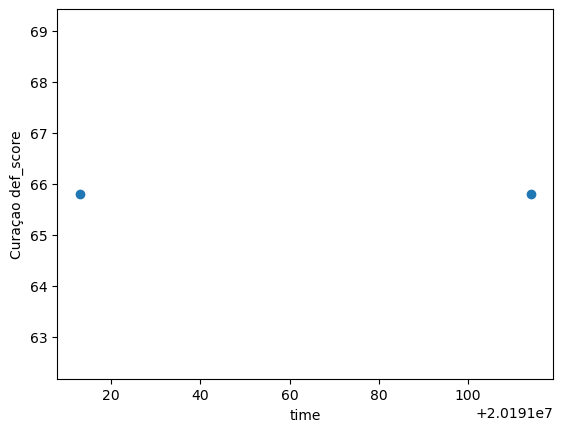

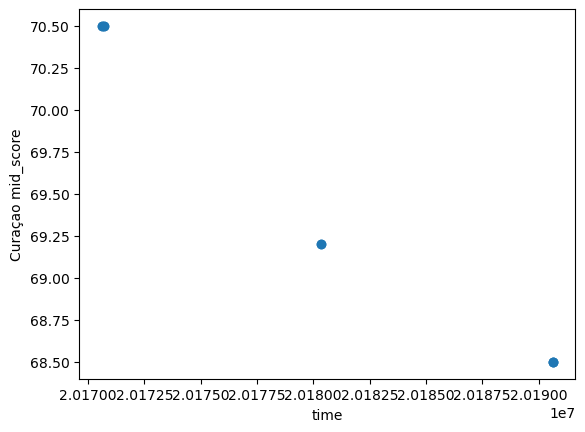

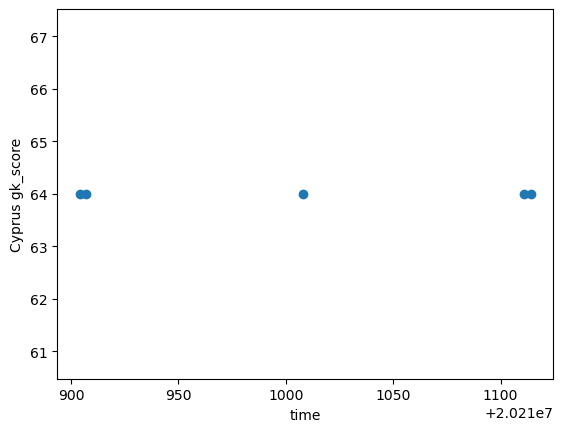

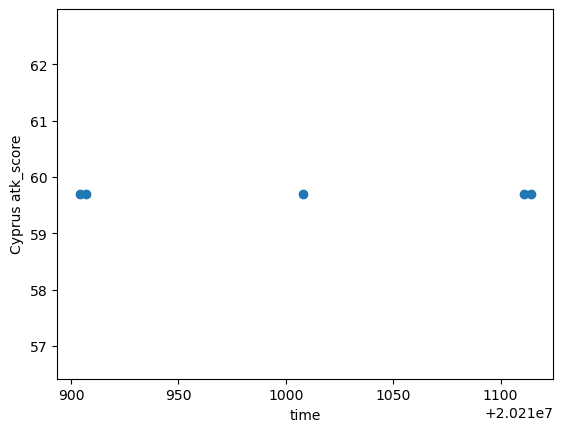

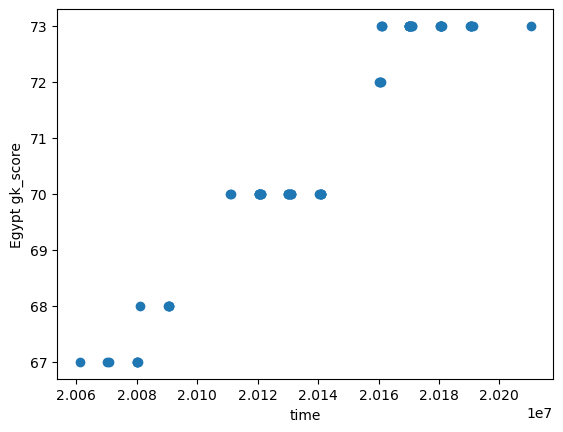

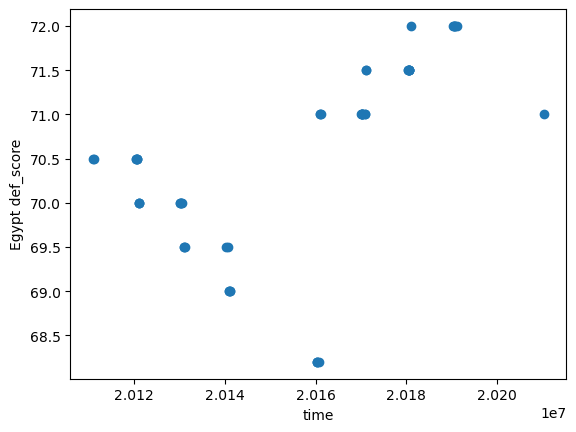

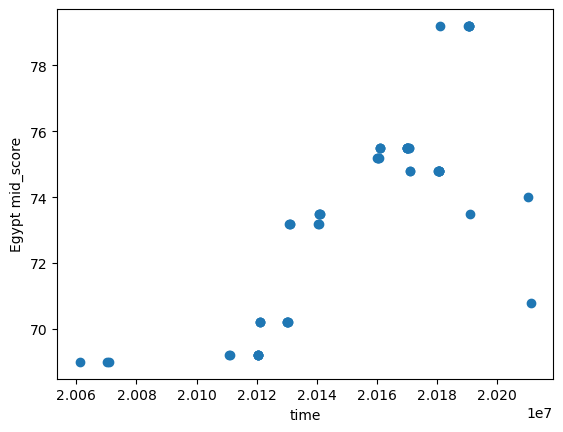

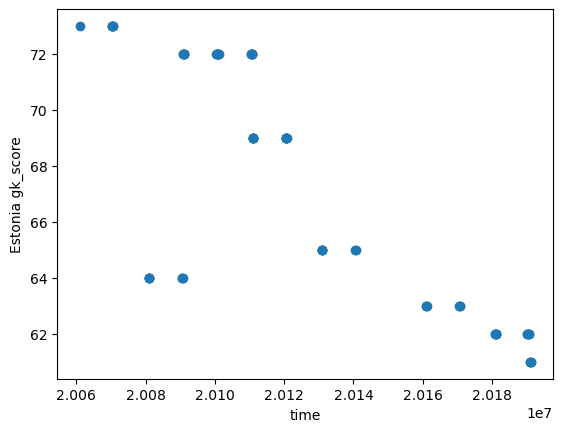

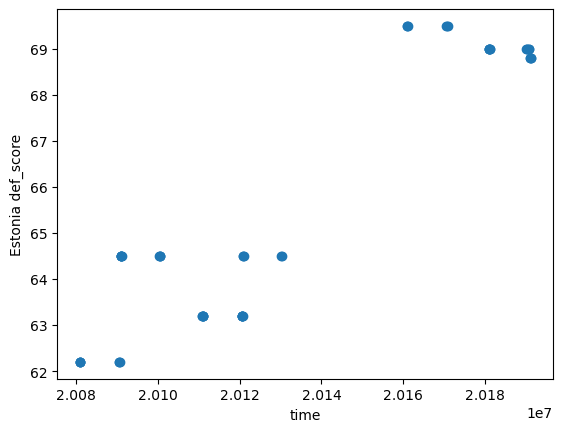

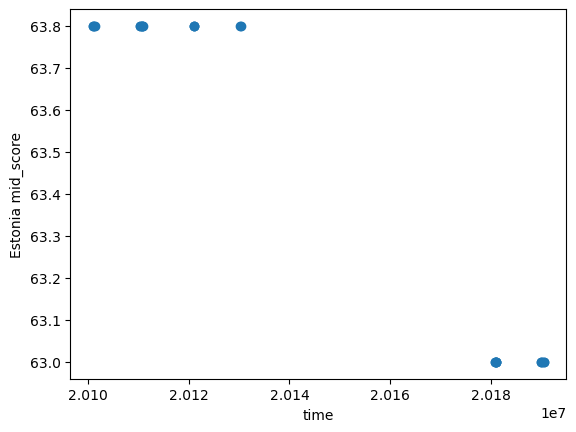

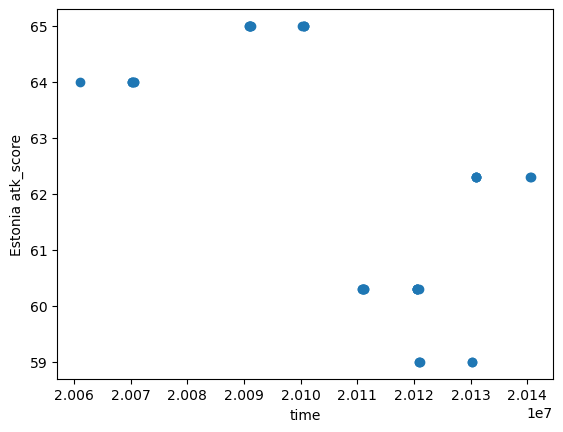

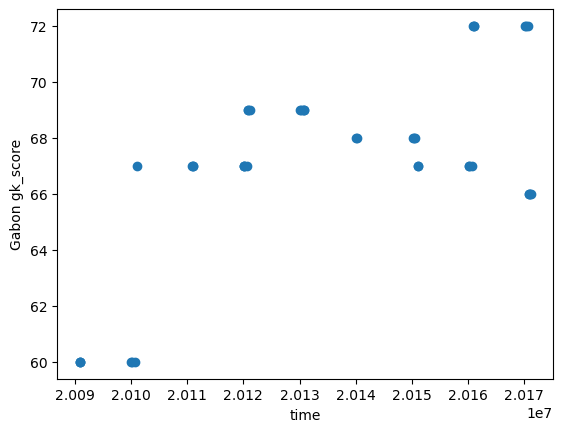

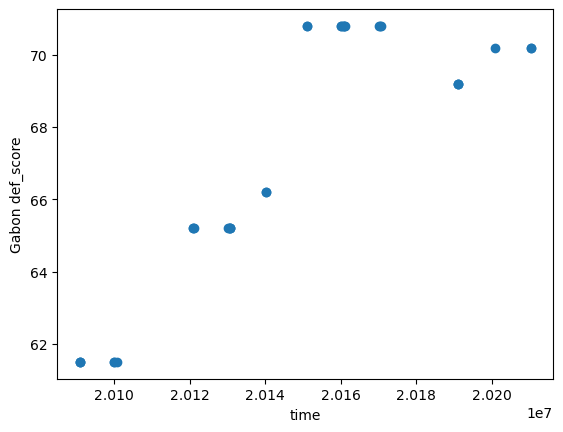

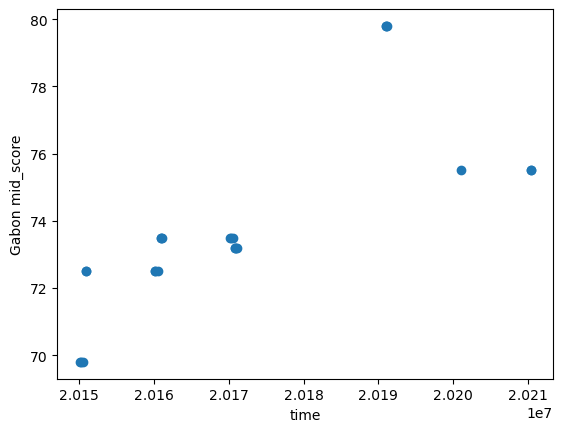

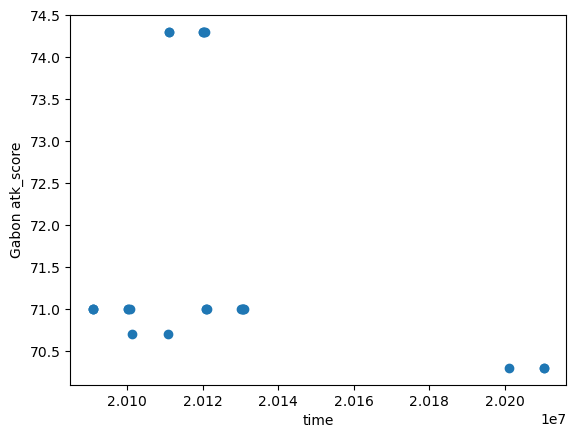

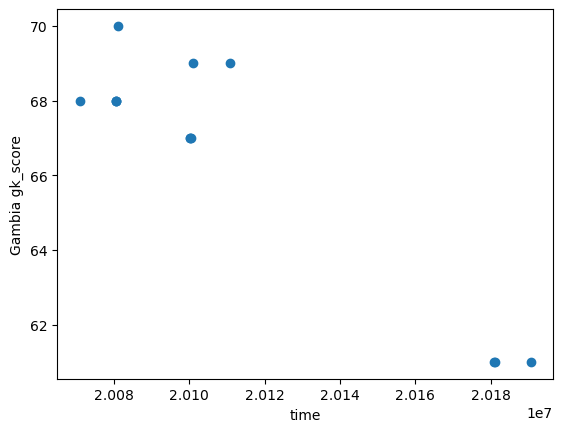

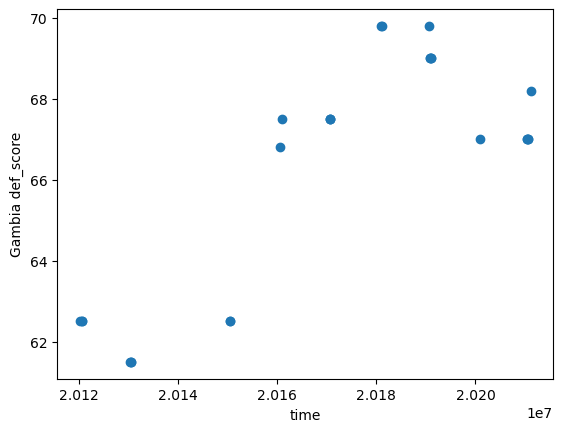

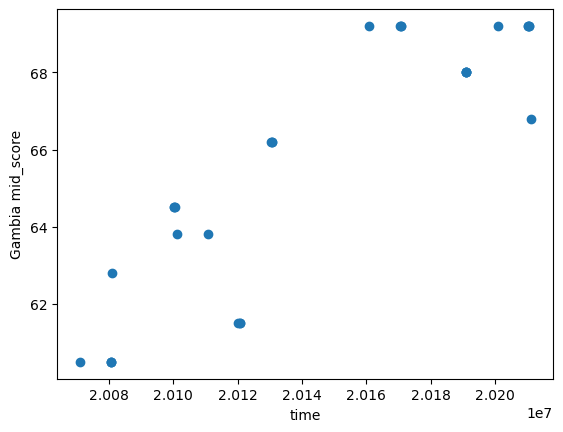

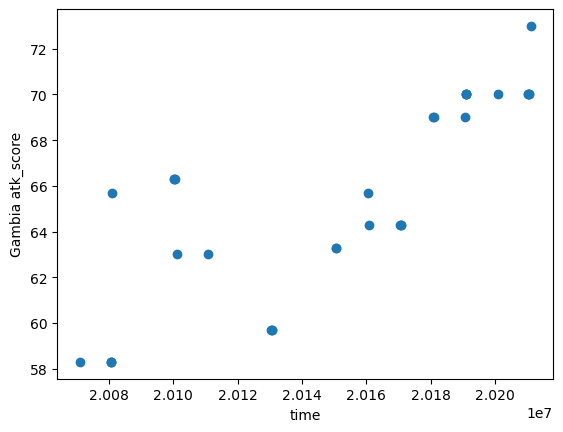

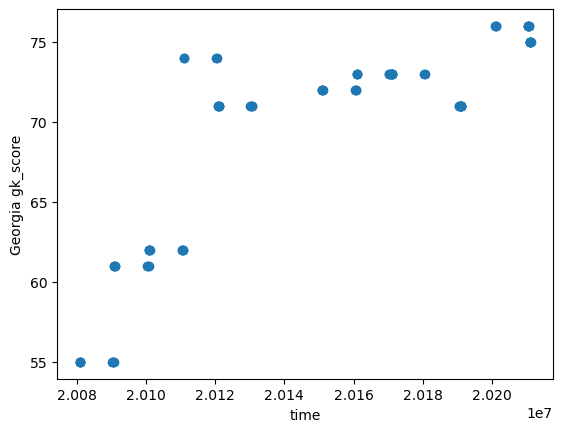

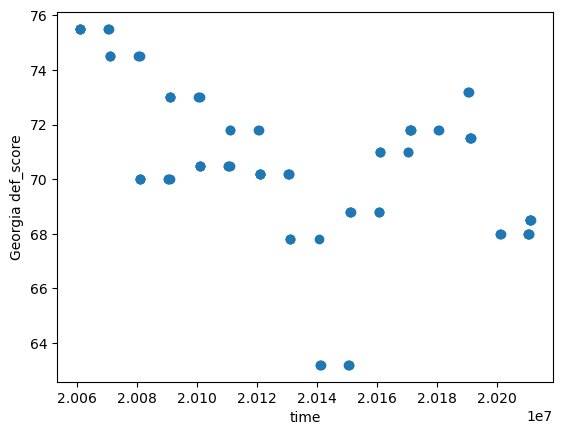

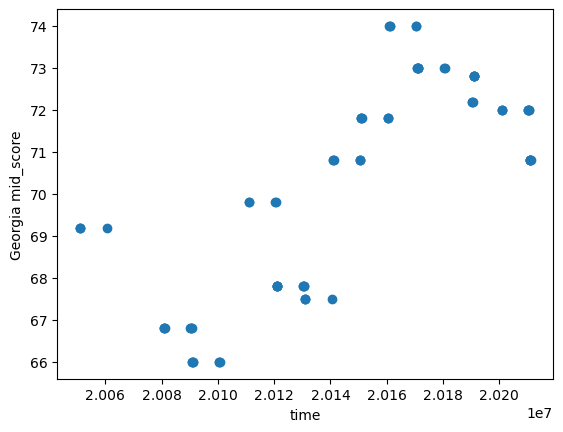

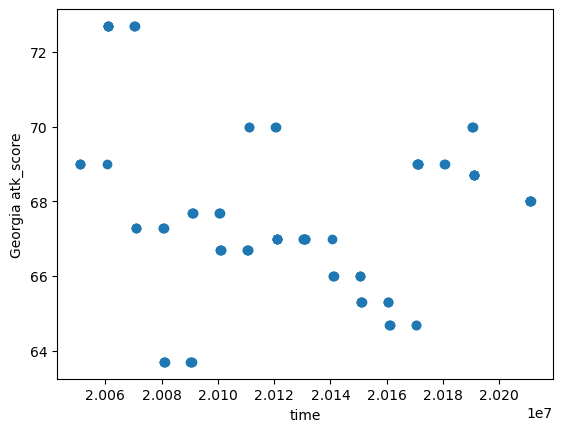

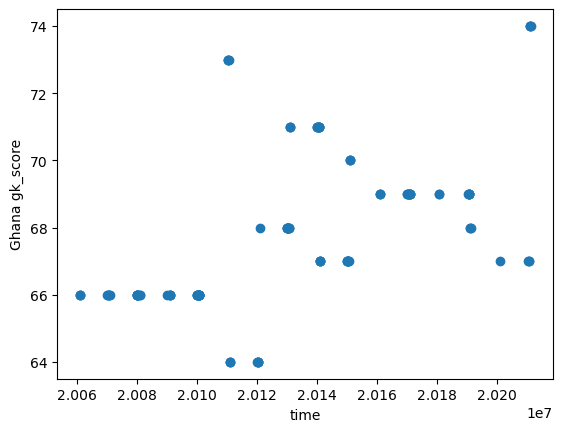

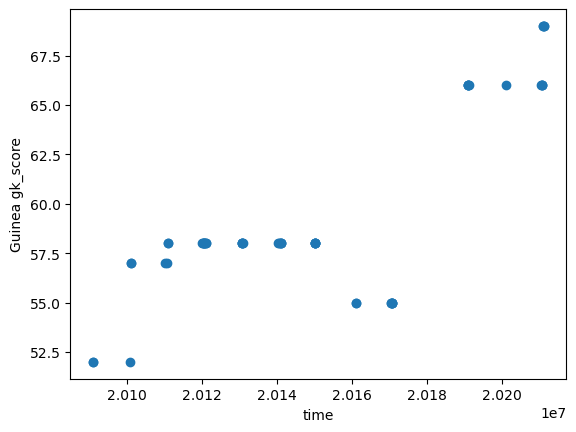

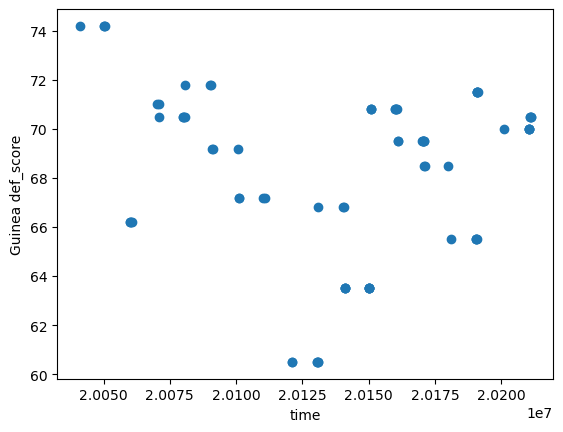

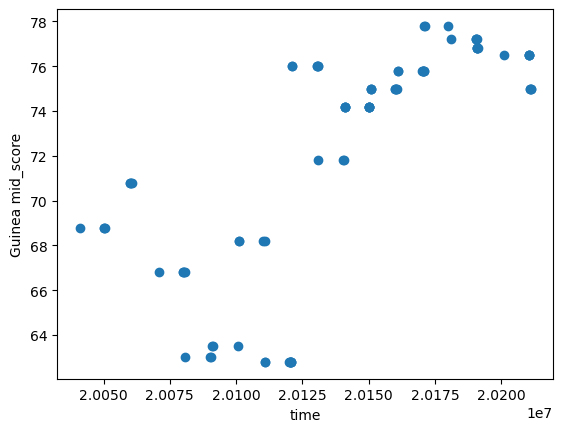

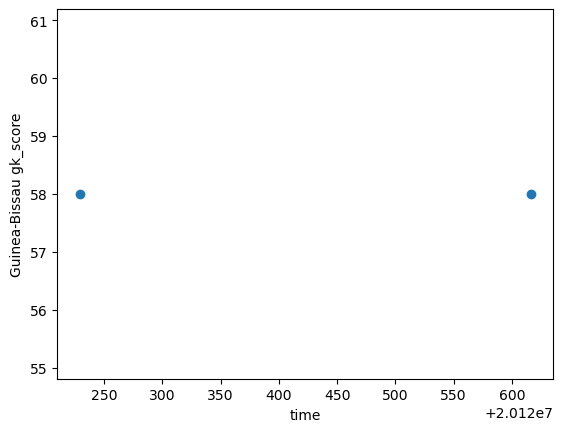

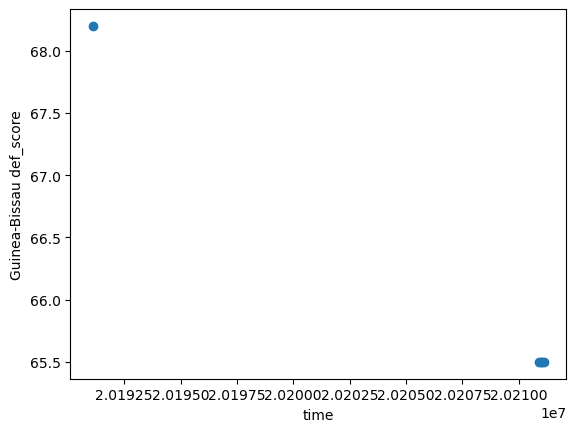

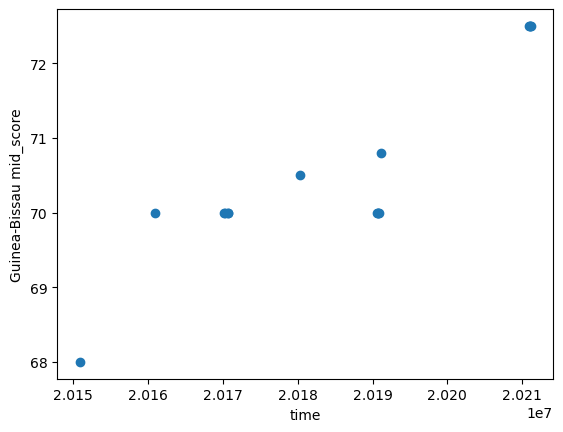

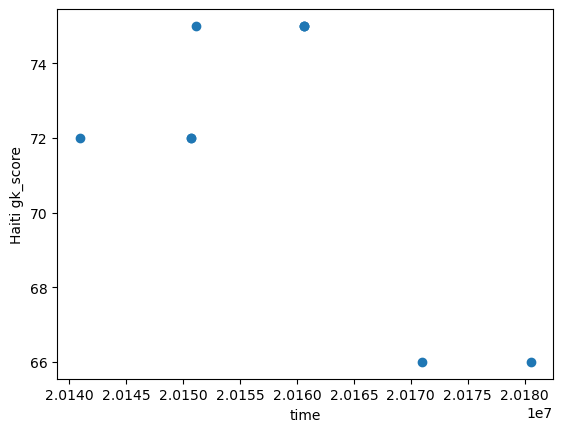

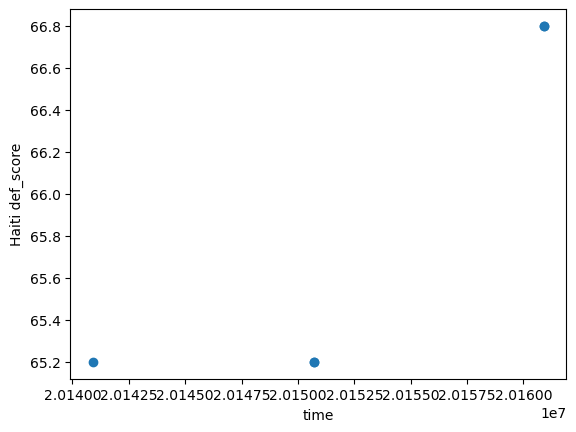

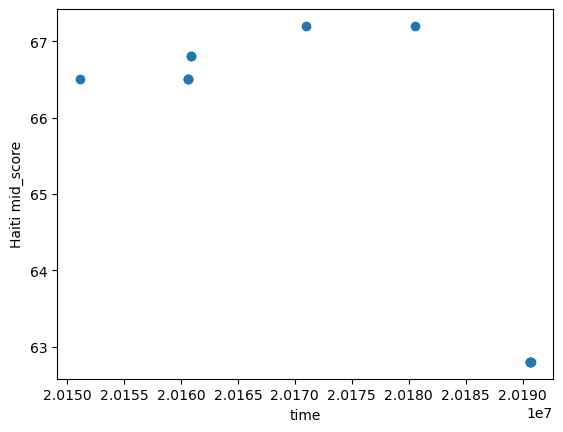

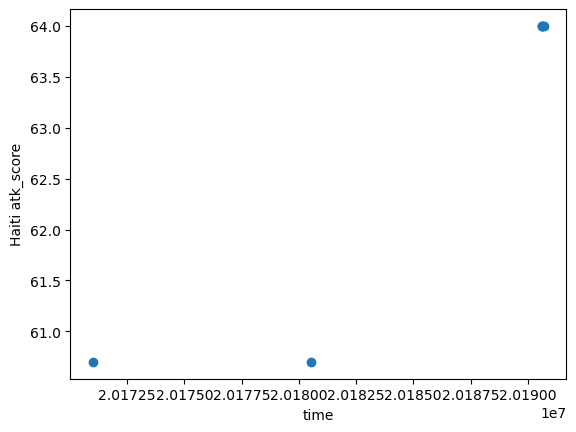

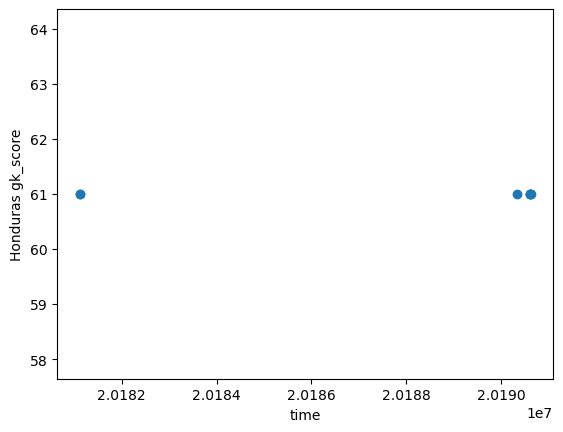

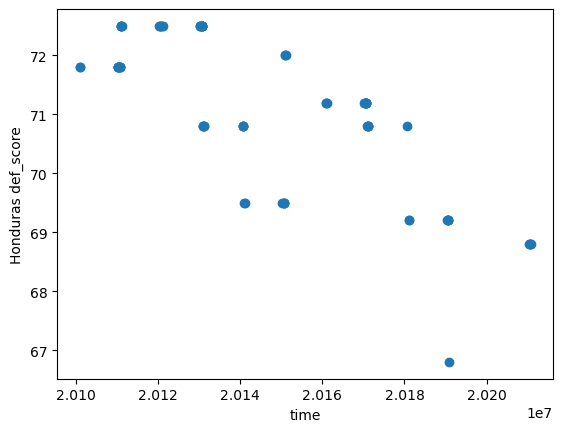

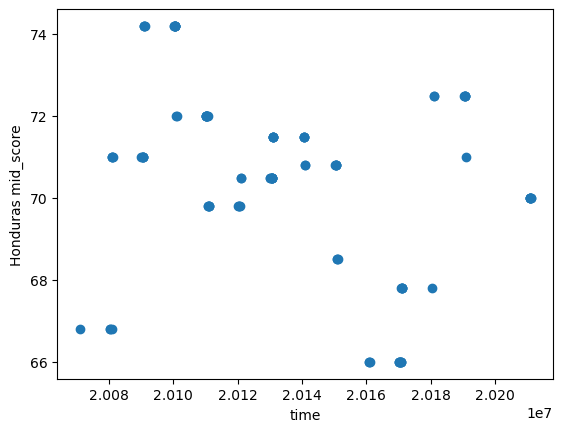

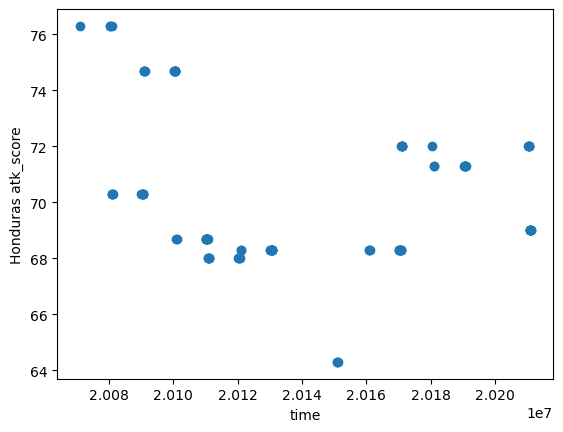

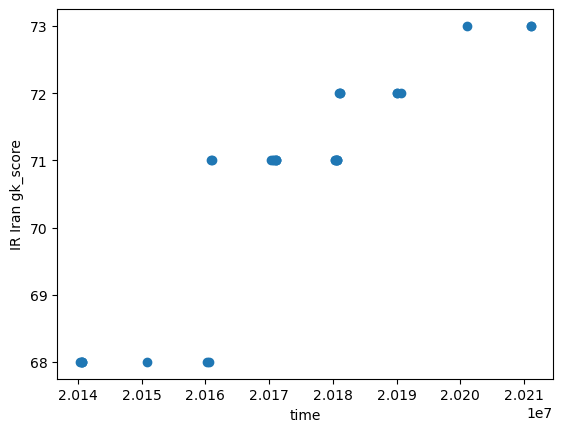

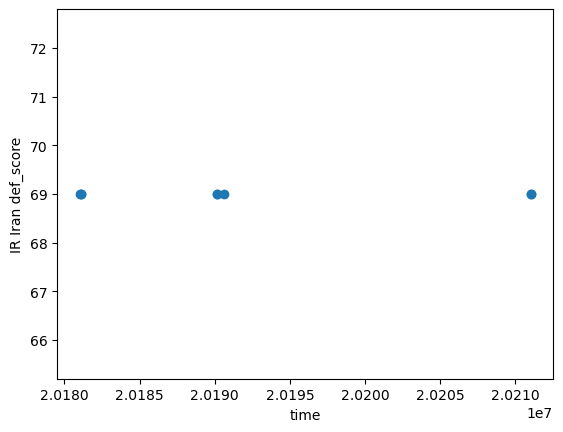

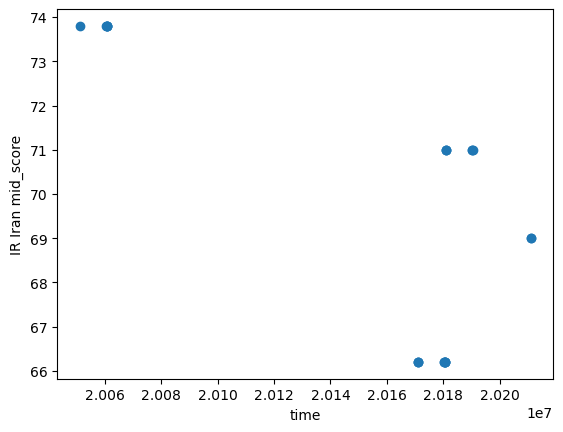

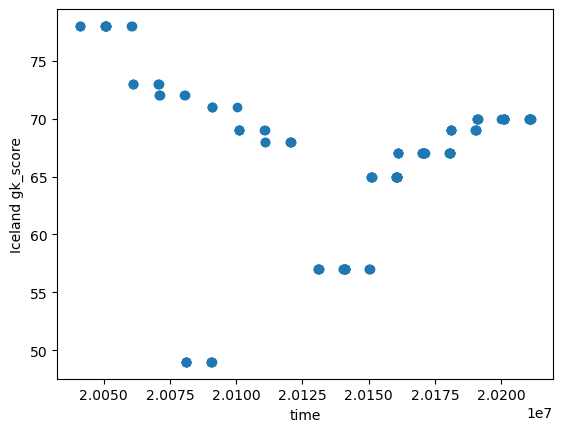

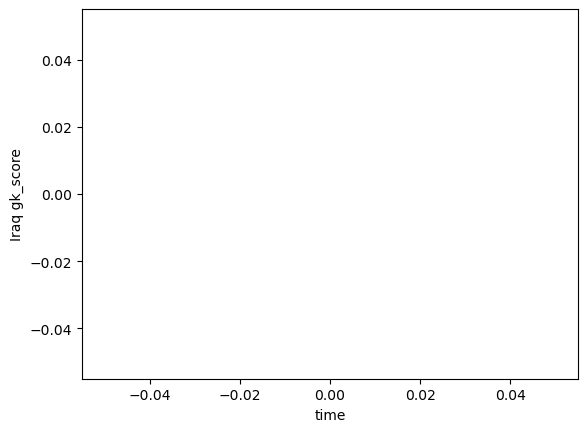

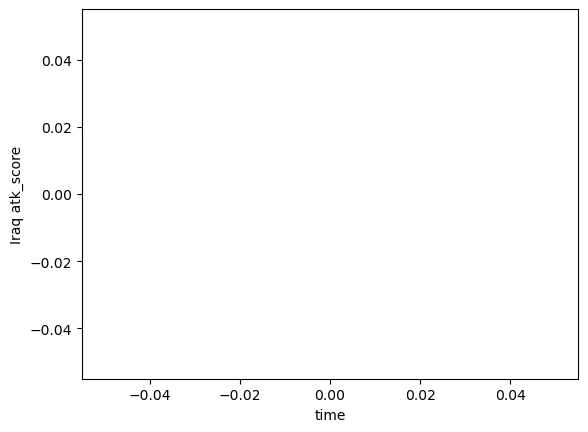

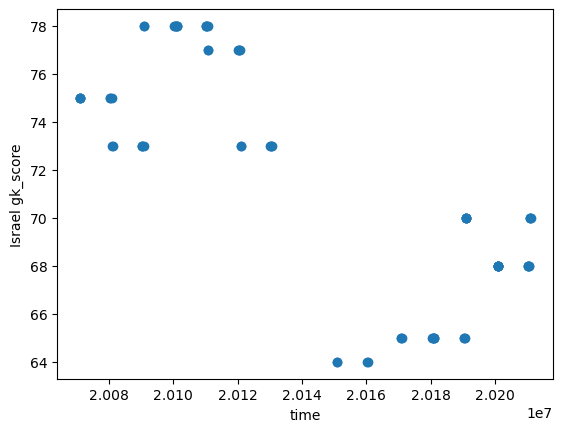

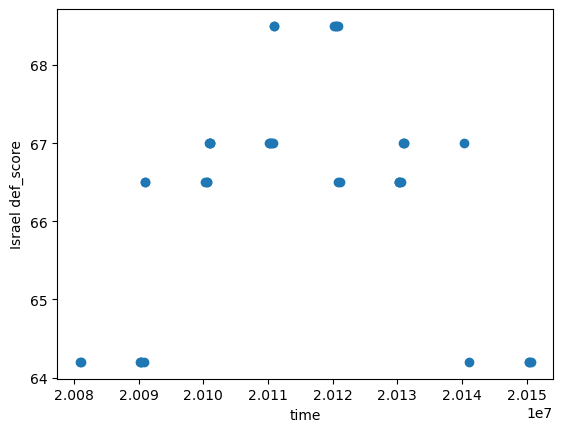

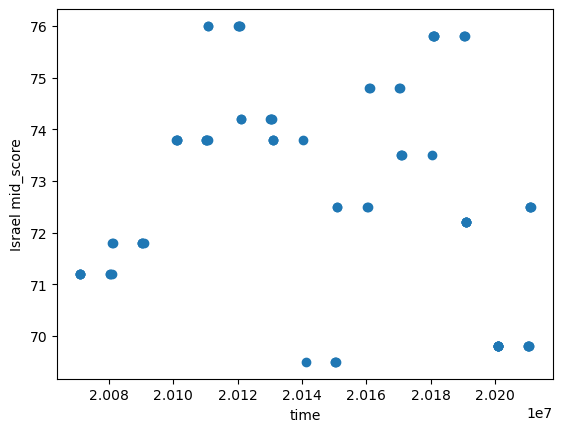

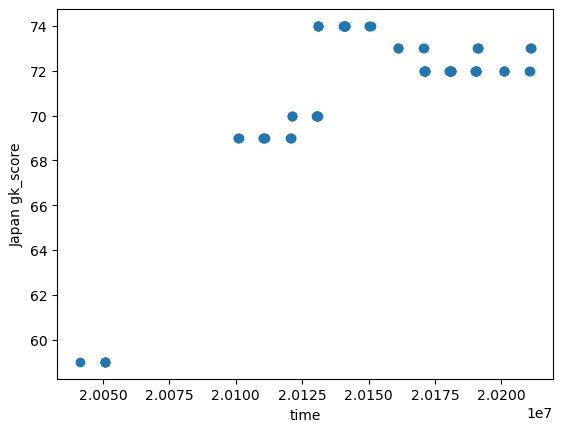

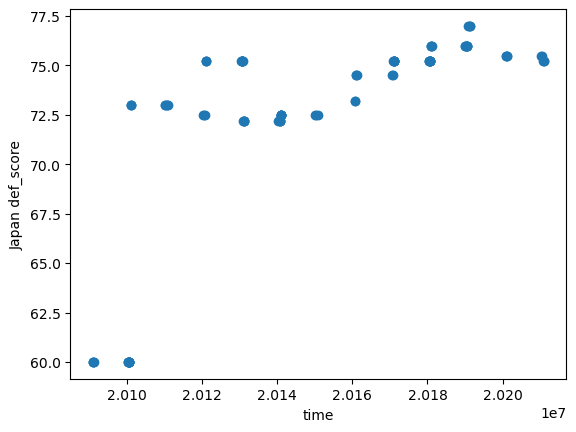

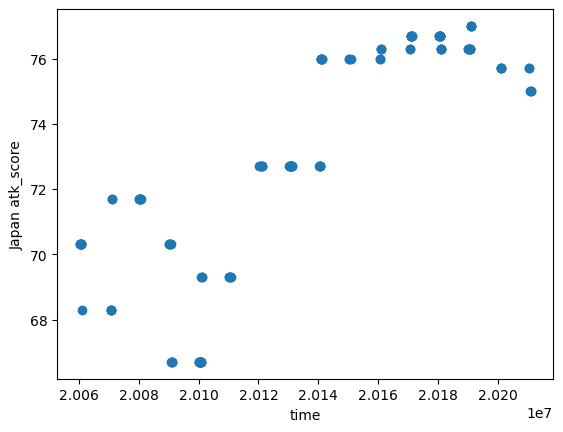

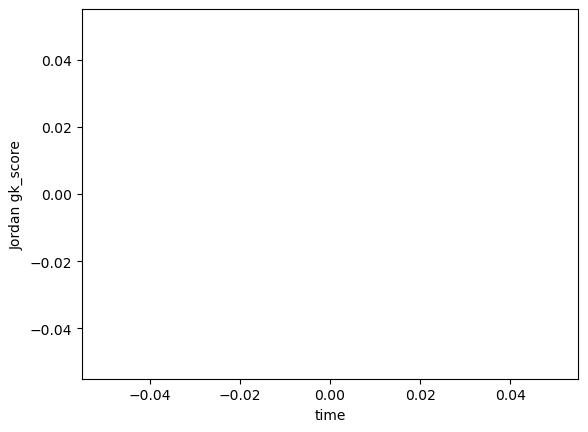

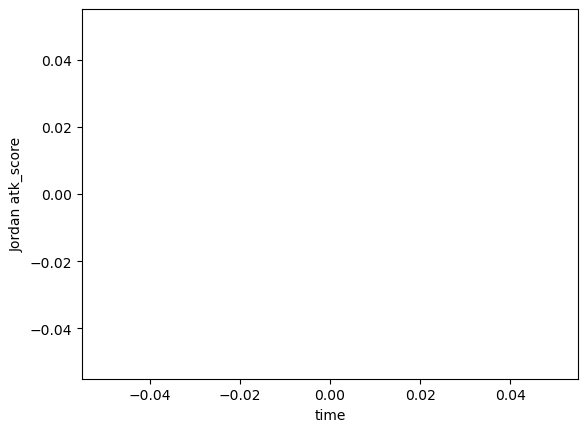

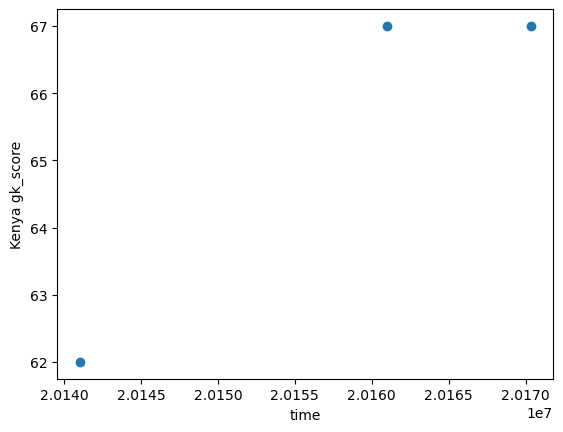

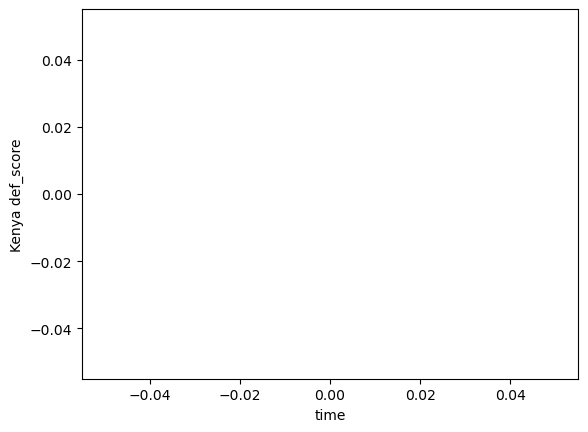

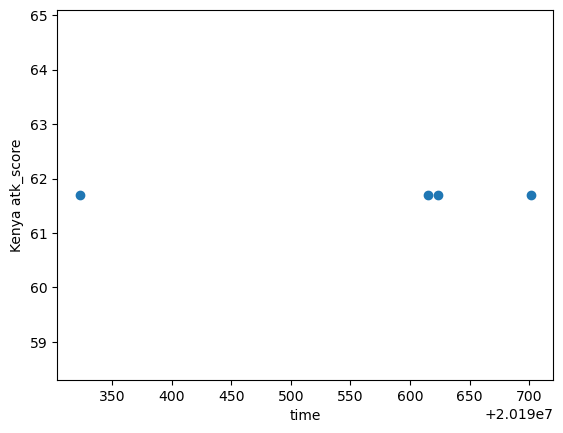

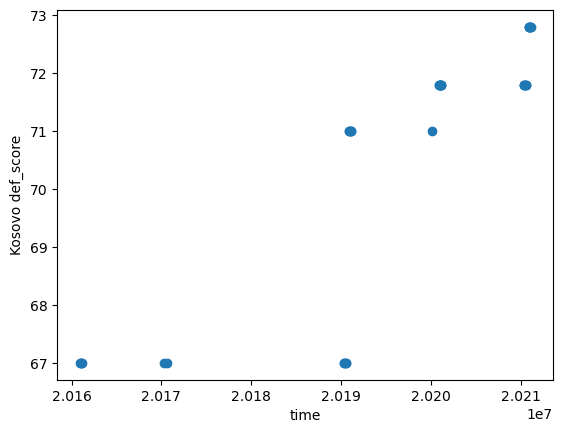

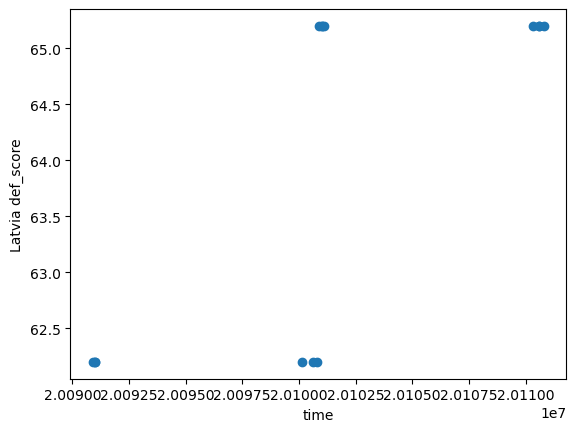

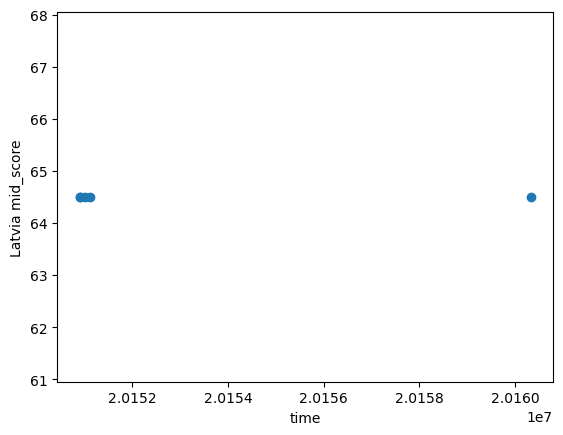

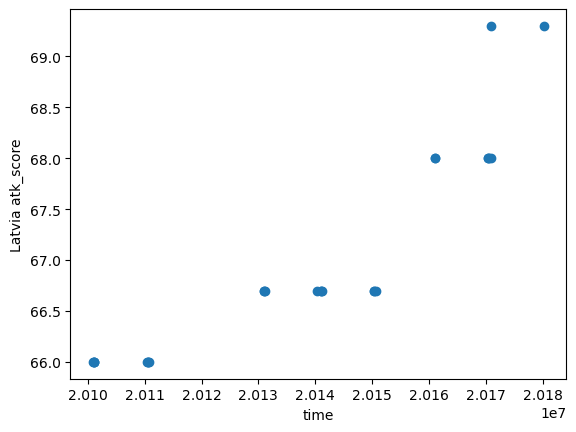

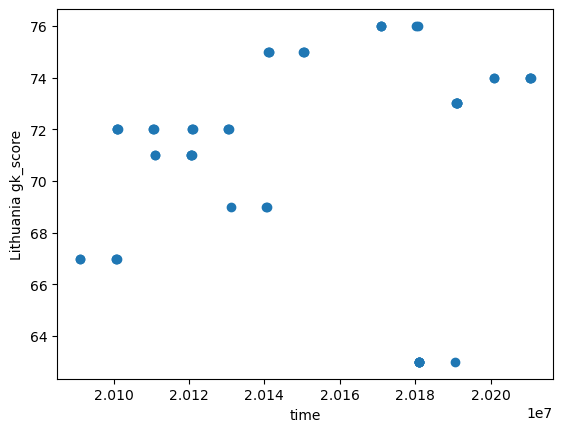

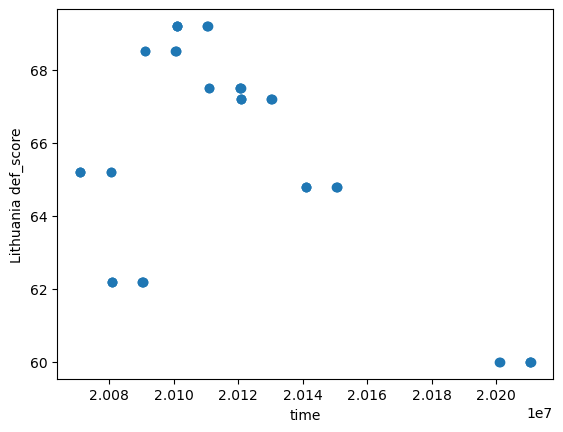

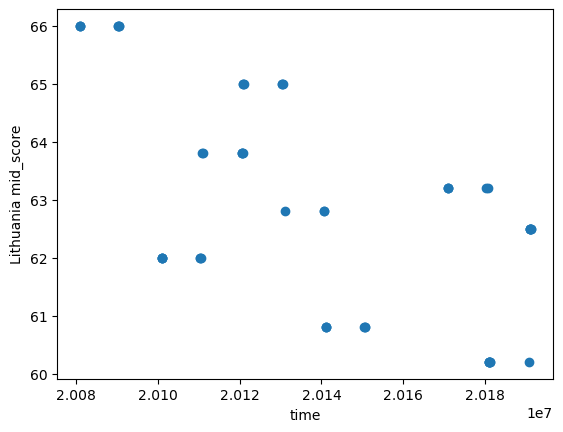

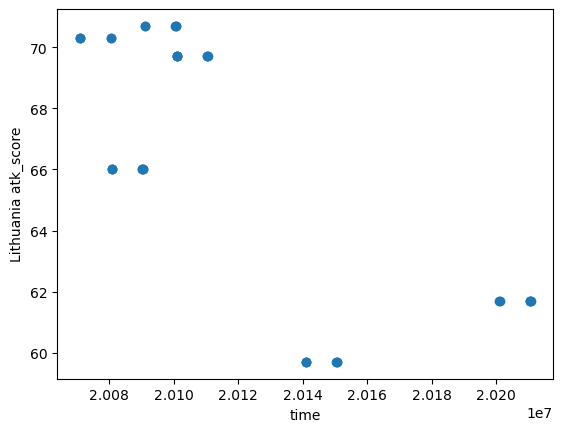

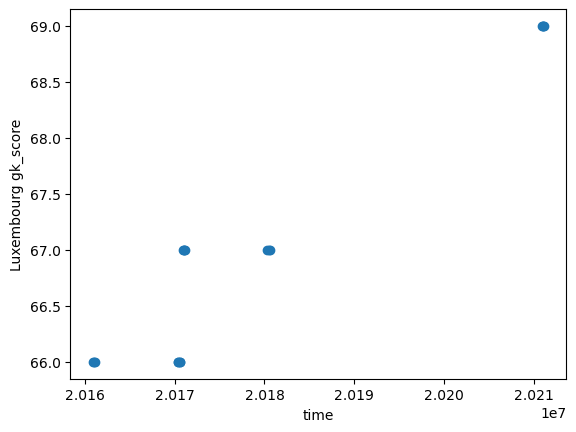

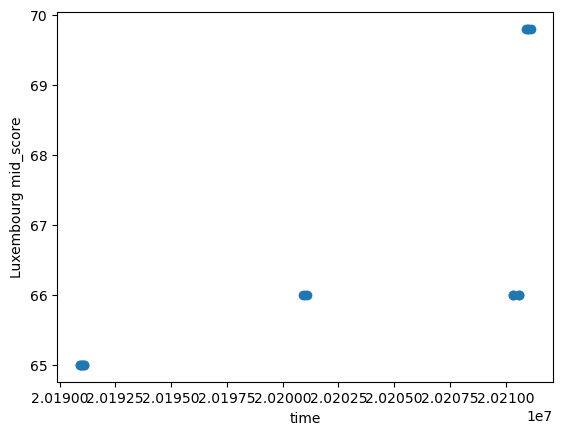

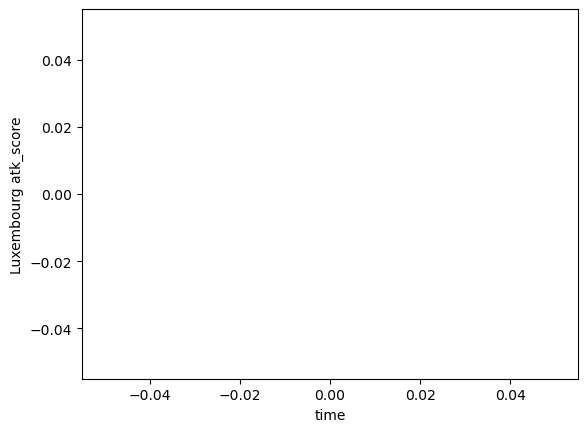

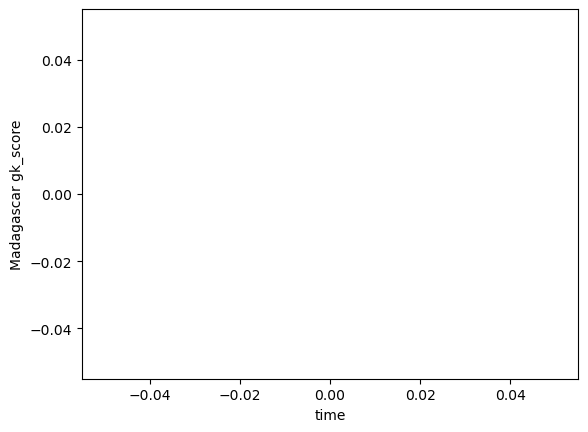

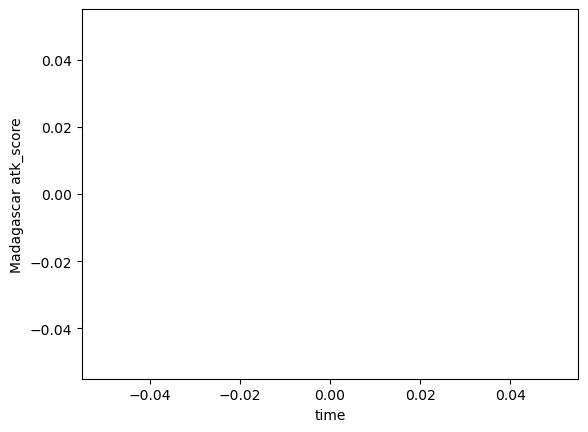

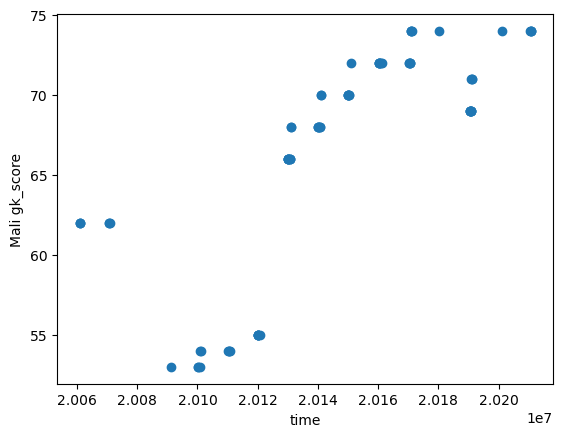

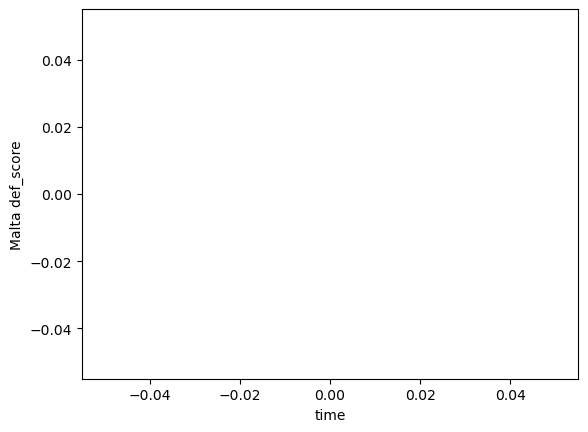

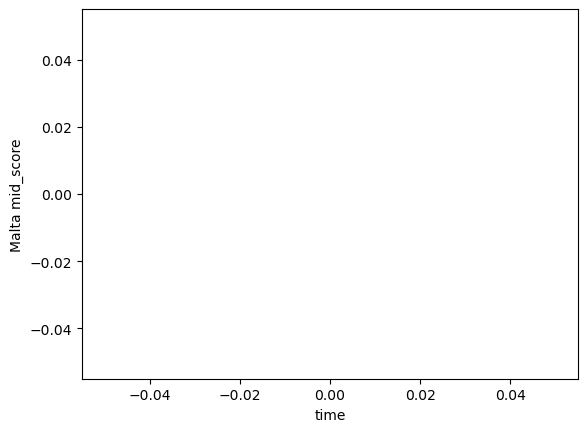

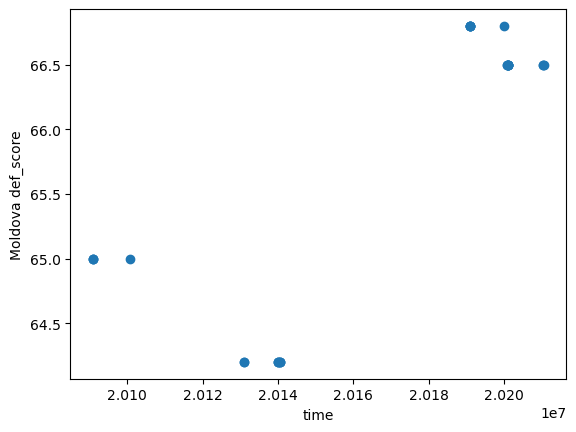

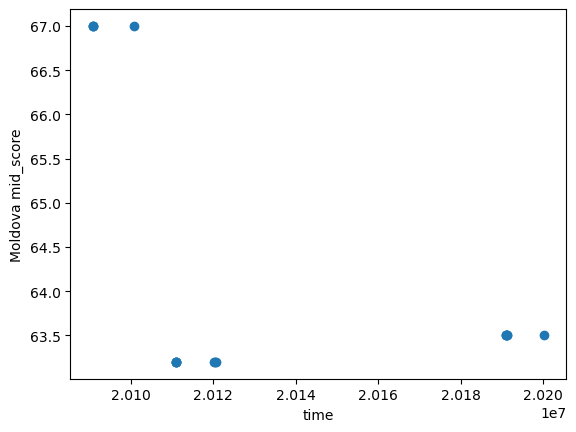

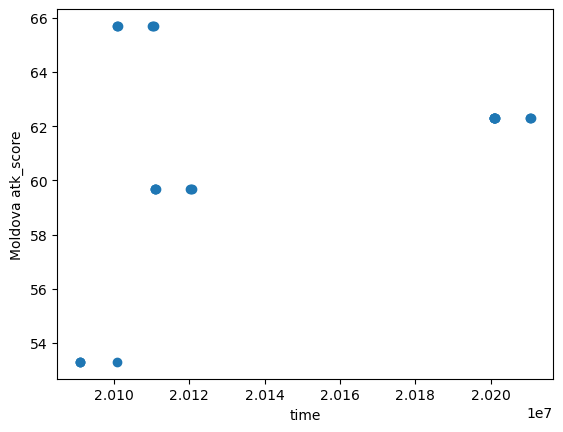

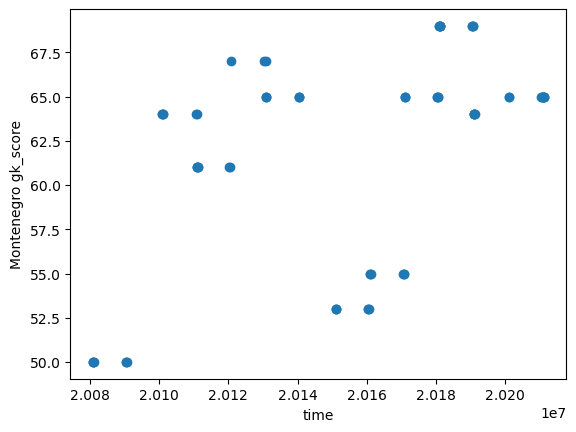

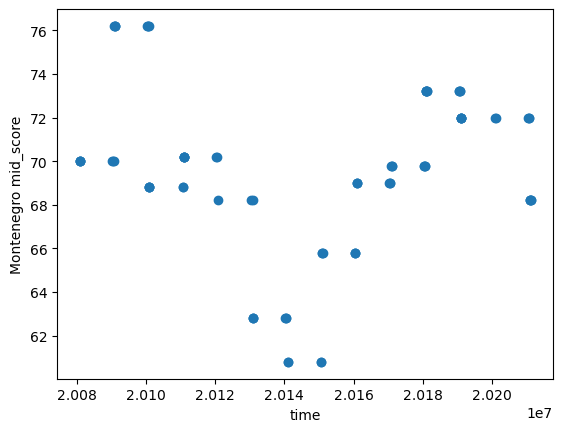

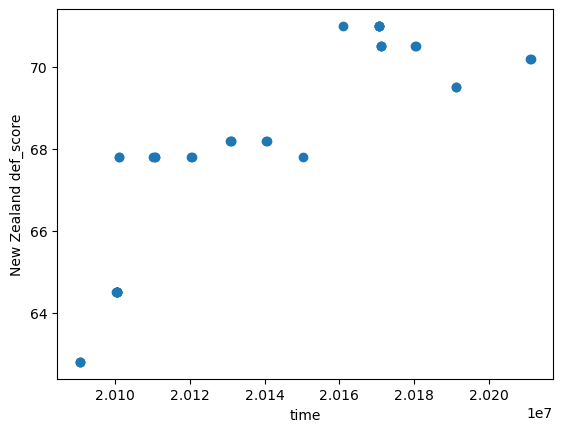

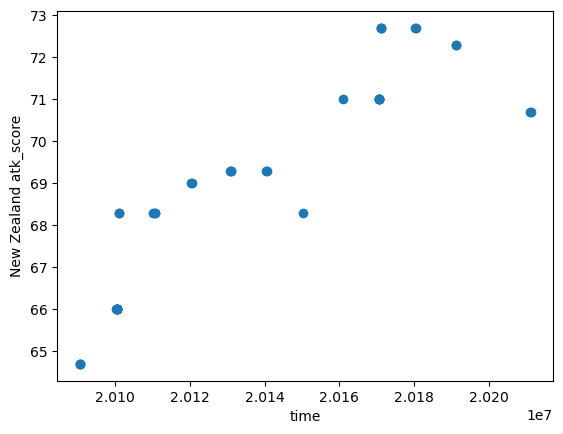

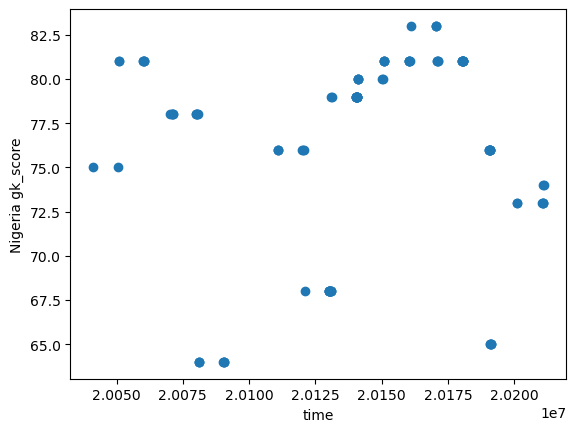

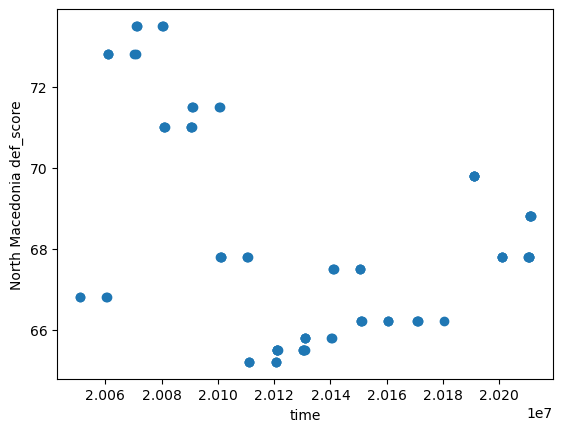

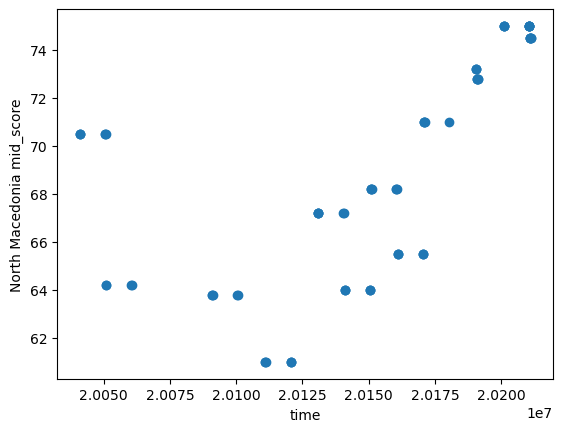

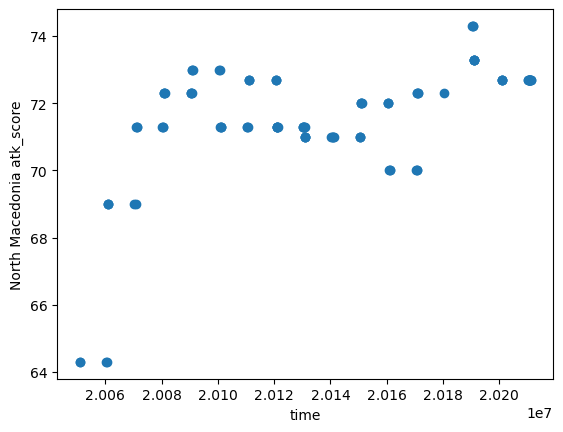

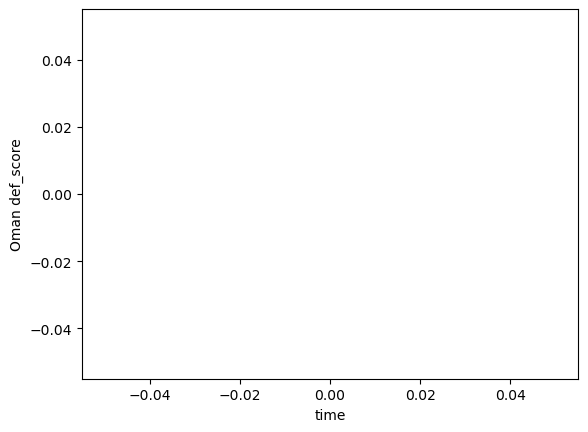

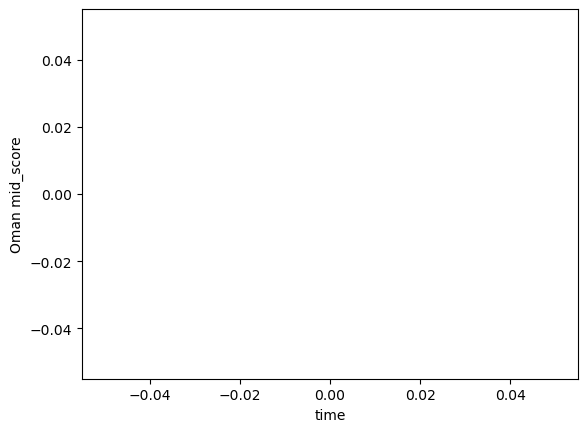

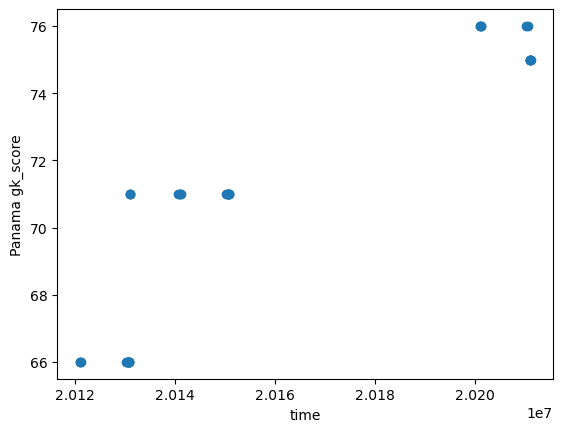

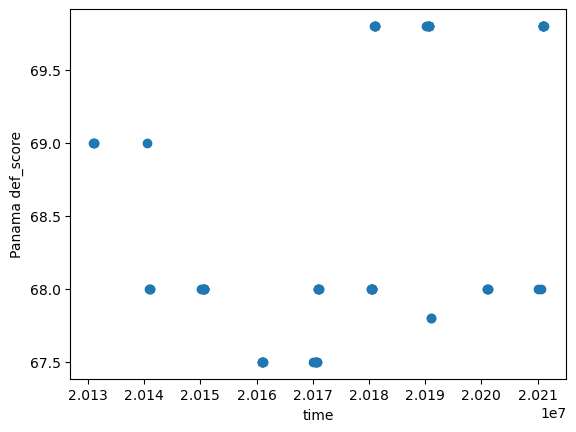

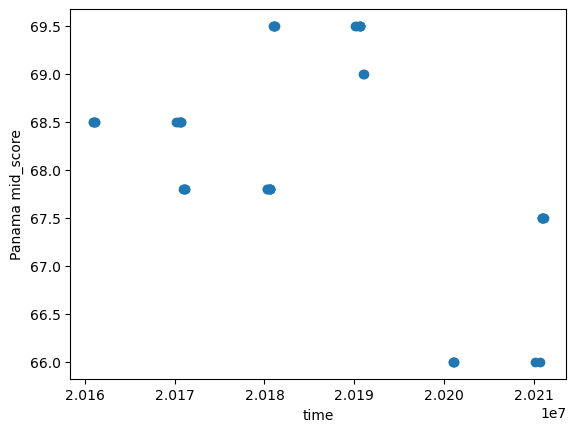

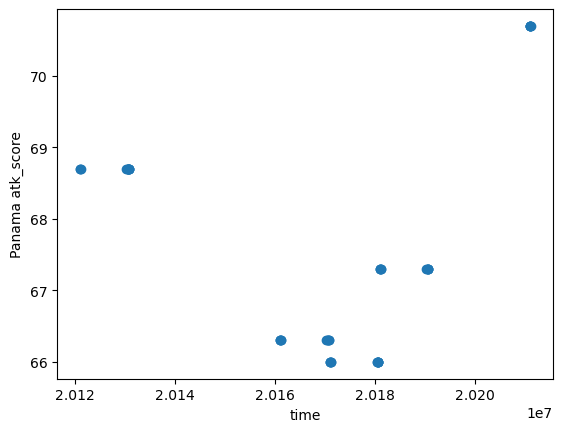

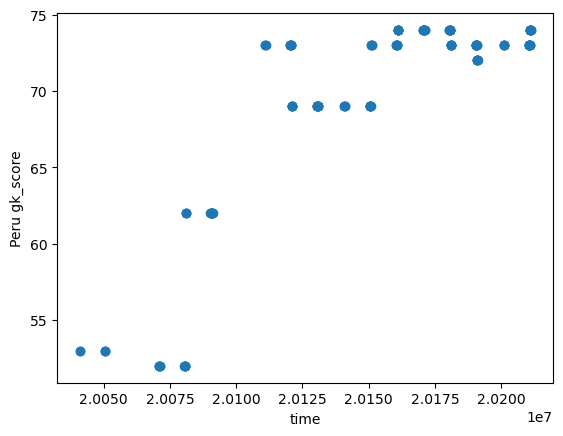

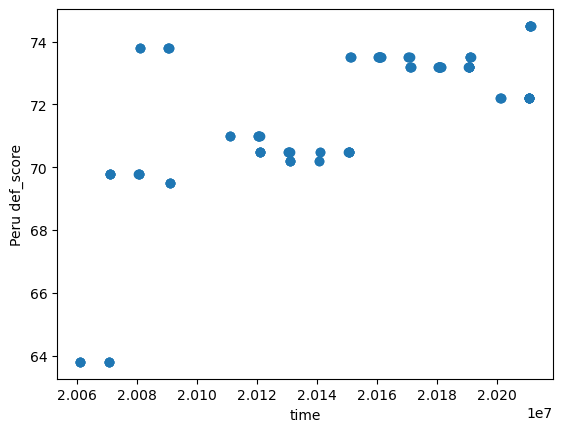

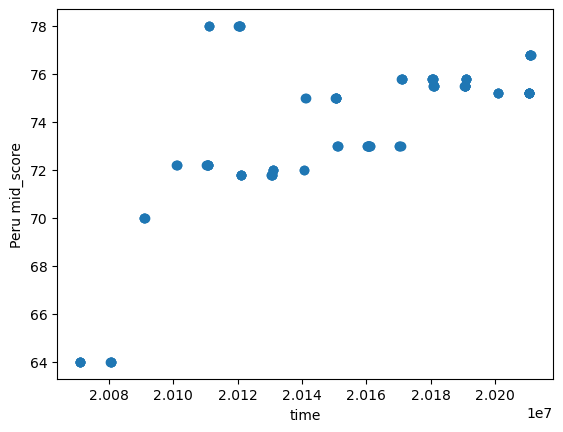

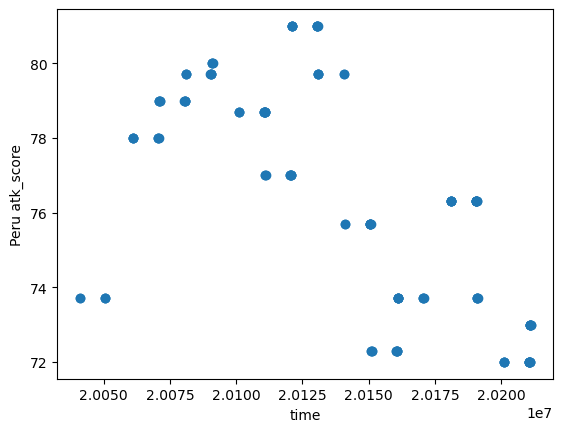

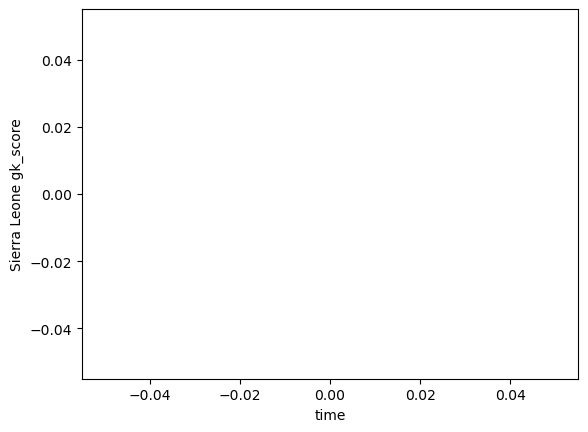

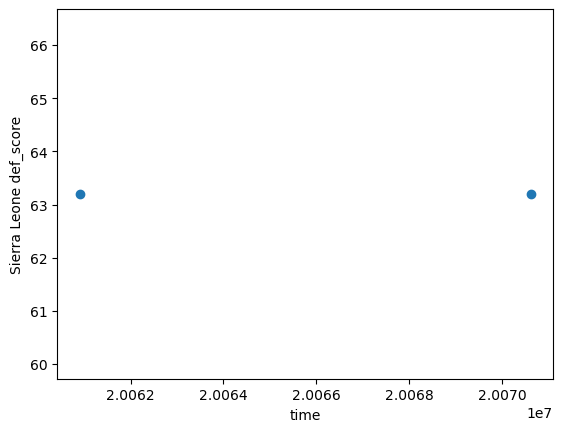

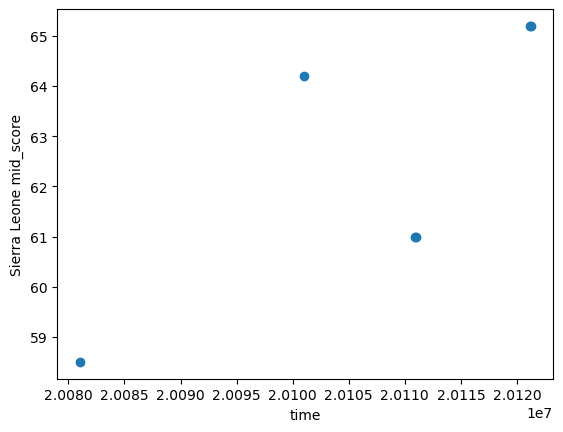

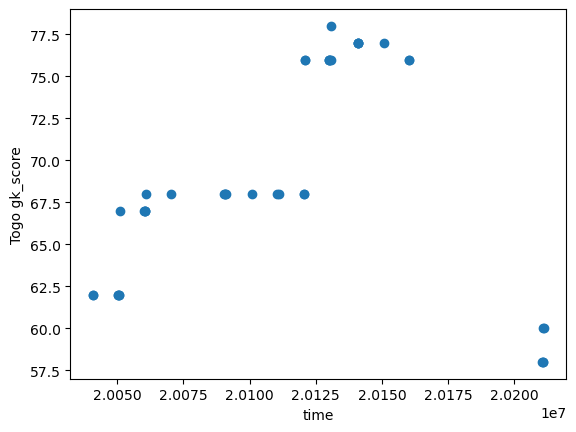

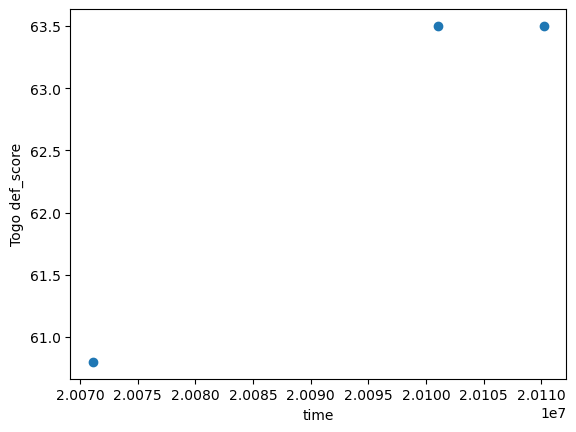

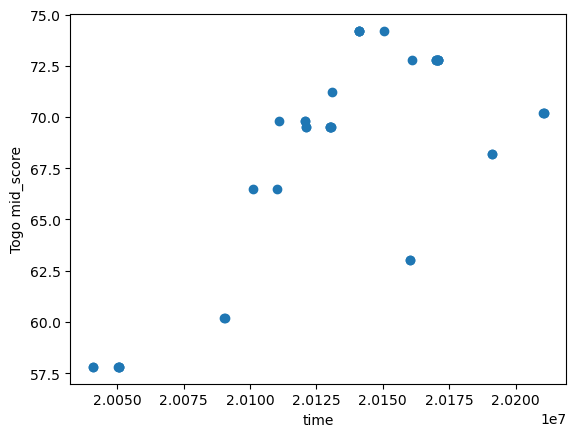

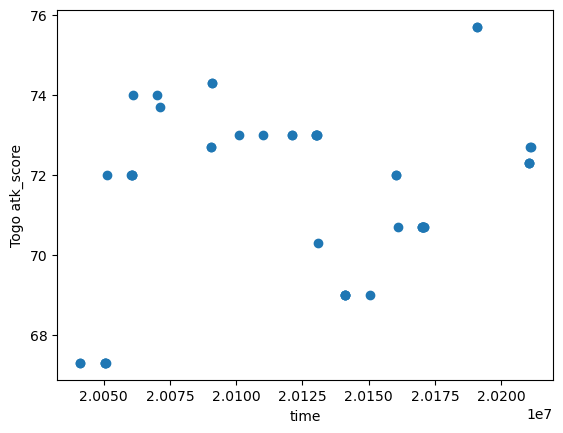

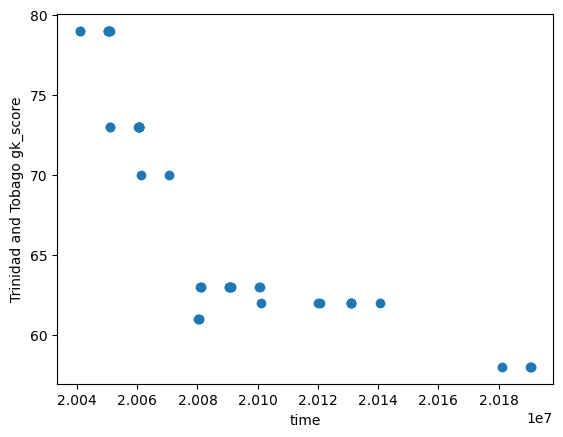

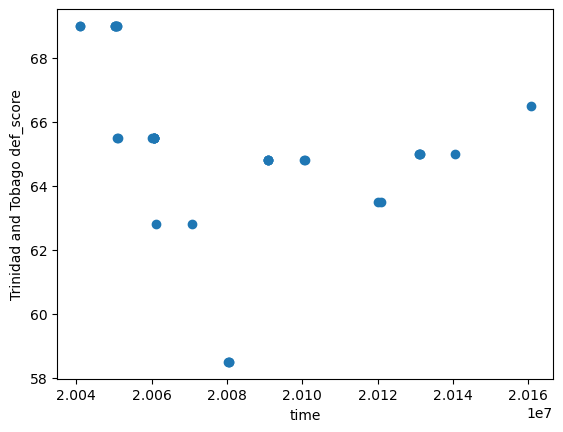

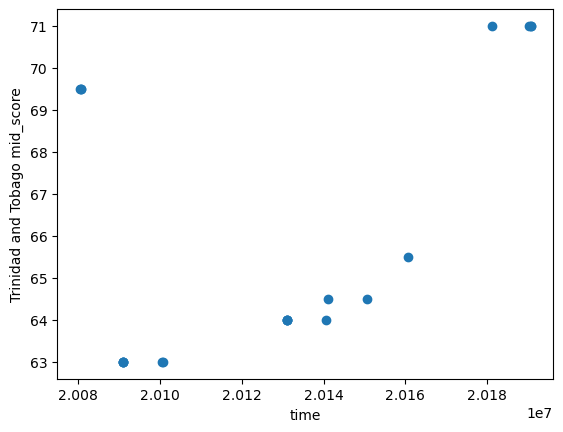

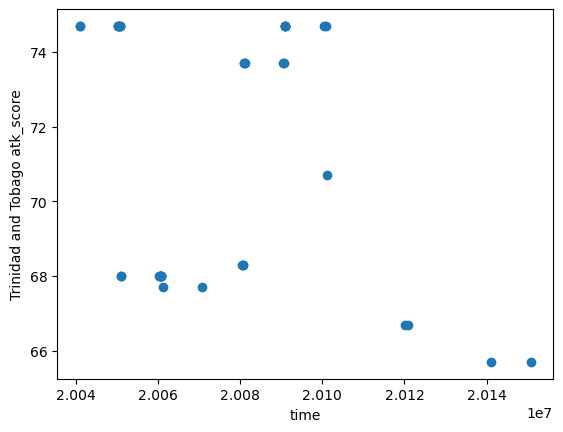

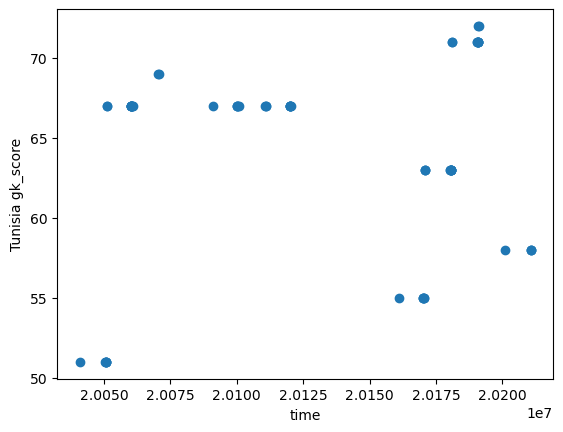

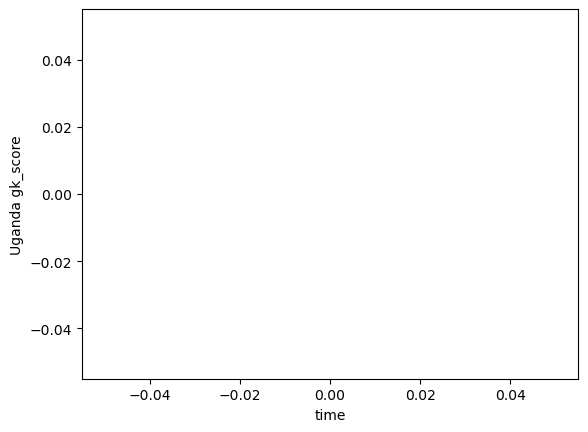

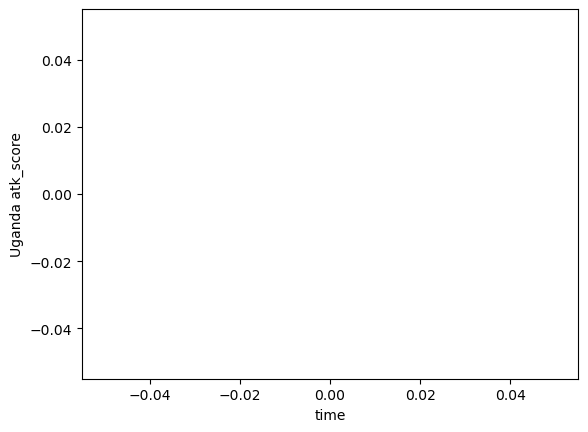

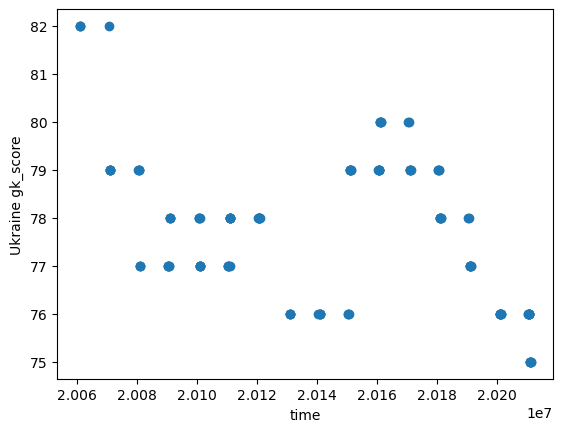

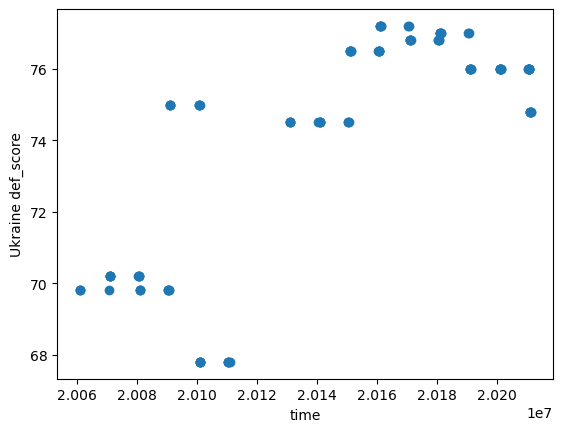

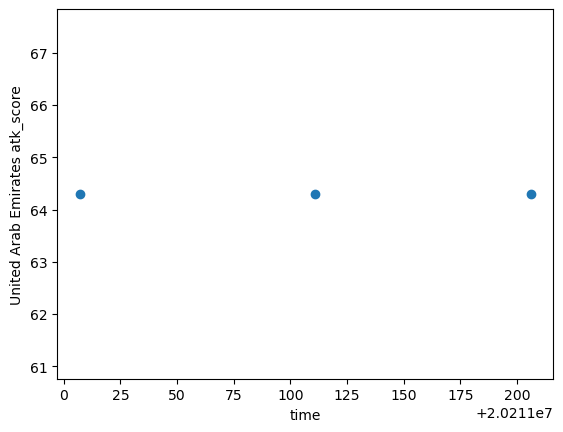

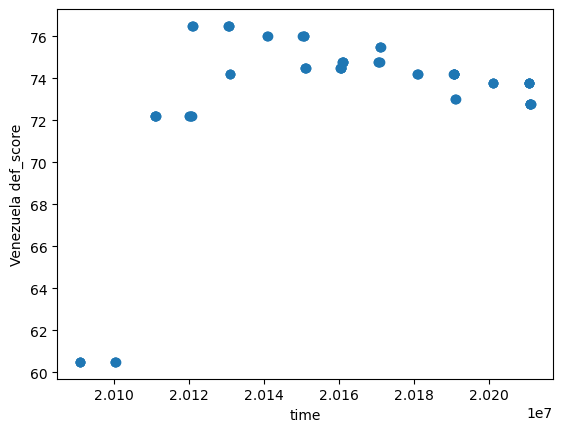

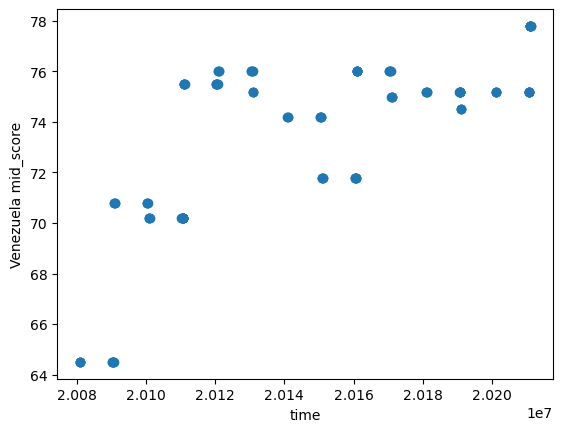

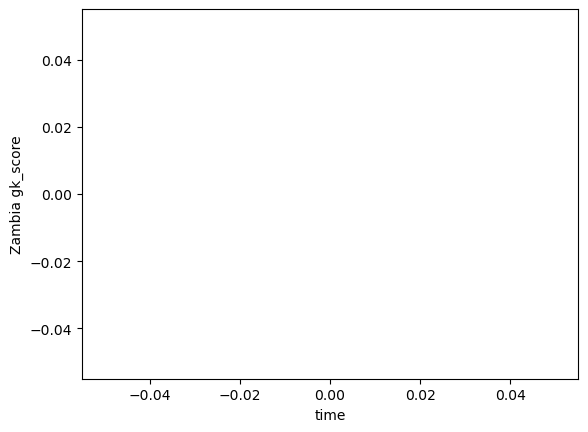

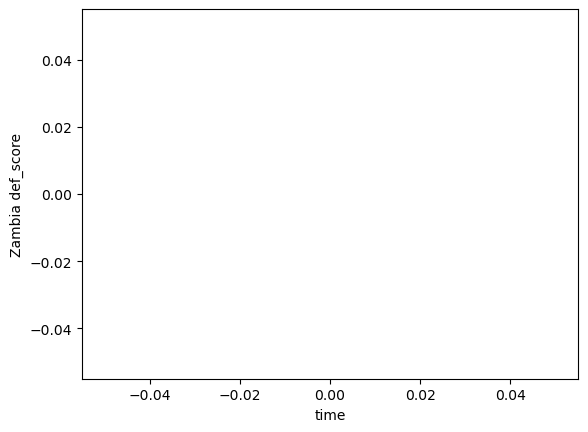

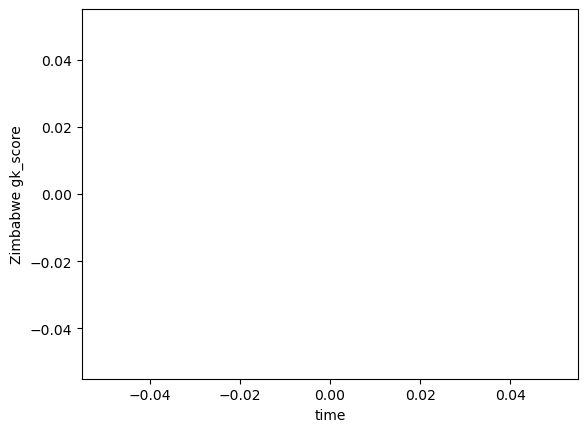

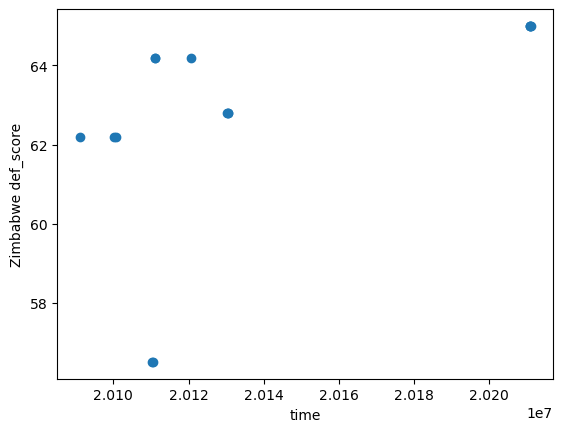

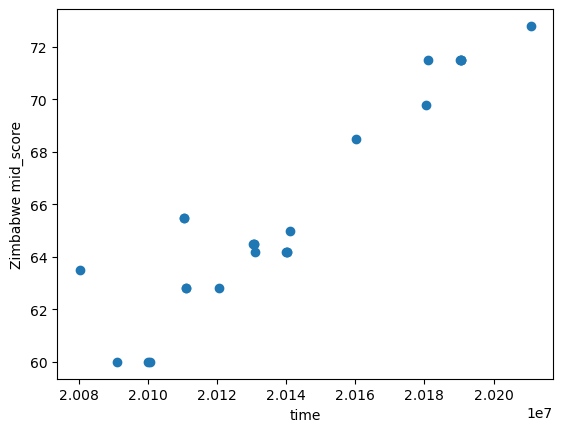

In [9]:
# initialise variables
target_graph_total =0
targets = []

# display all prediction target data
for country in country_list:
    show_model_data_country(country)

In [10]:
print("total graphs to be examined: {}".format(target_graph_total))
print(targets)

total graphs to be examined: 151
['Armenia def_score', 'Azerbaijan def_score', 'Azerbaijan atk_score', 'Comoros atk_score', 'Iraq gk_score', 'Iraq atk_score', 'Jordan gk_score', 'Jordan atk_score', 'Kenya def_score', 'Luxembourg atk_score', 'Madagascar gk_score', 'Madagascar atk_score', 'Malta def_score', 'Malta mid_score', 'Oman def_score', 'Oman mid_score', 'Sierra Leone gk_score', 'Uganda gk_score', 'Uganda atk_score', 'Zambia gk_score', 'Zambia def_score', 'Zimbabwe gk_score']


In [13]:
no_model_data_country = []
no_model_data_list = []

for elem in targets:
    sp = elem.split(" ")
    
    if len(sp) > 2:
        result = ' '.join(sp[:-1])
        sp = [result,sp[-1]]
        
    no_model_data_country.append([sp[0]])
    no_model_data_list.append(sp)

    
print(no_model_data_country)
print(len(no_model_data_country))
print(no_model_data_list)

[['Armenia'], ['Azerbaijan'], ['Azerbaijan'], ['Comoros'], ['Iraq'], ['Iraq'], ['Jordan'], ['Jordan'], ['Kenya'], ['Luxembourg'], ['Madagascar'], ['Madagascar'], ['Malta'], ['Malta'], ['Oman'], ['Oman'], ['Sierra Leone'], ['Uganda'], ['Uganda'], ['Zambia'], ['Zambia'], ['Zimbabwe']]
22
[['Armenia', 'def_score'], ['Azerbaijan', 'def_score'], ['Azerbaijan', 'atk_score'], ['Comoros', 'atk_score'], ['Iraq', 'gk_score'], ['Iraq', 'atk_score'], ['Jordan', 'gk_score'], ['Jordan', 'atk_score'], ['Kenya', 'def_score'], ['Luxembourg', 'atk_score'], ['Madagascar', 'gk_score'], ['Madagascar', 'atk_score'], ['Malta', 'def_score'], ['Malta', 'mid_score'], ['Oman', 'def_score'], ['Oman', 'mid_score'], ['Sierra Leone', 'gk_score'], ['Uganda', 'gk_score'], ['Uganda', 'atk_score'], ['Zambia', 'gk_score'], ['Zambia', 'def_score'], ['Zimbabwe', 'gk_score']]


In [12]:
df_list = []

for country in no_model_data_country:
    mask = df['home_team'].isin(country) | df['away_team'].isin(country)
    df_list.append(df[mask])

print(df_list[2])

            date         home_team         away_team home_team_continent  \
3792  2016-10-08        Azerbaijan            Norway              Europe   
3820  2016-10-11    Czech Republic        Azerbaijan              Europe   
3844  2016-11-11  Northern Ireland        Azerbaijan              Europe   
3945  2017-03-26        Azerbaijan           Germany              Europe   
4011  2017-06-10        Azerbaijan  Northern Ireland              Europe   

     away_team_continent  home_team_fifa_rank  away_team_fifa_rank  \
3792              Europe                  133                   70   
3820              Europe                   33                  133   
3844              Europe                   36                   88   
3945              Europe                   89                    3   
4011              Europe                   76                   28   

      home_team_total_fifa_points  away_team_total_fifa_points  \
3792                          252                       